# Programming with Data Project: Heart failure clinical records 

## 1. Introduction

**Introduction to Heart Failure:**
Heart failure, sometimes referred to as HF, is a chronic condition where the heart muscle becomes weakened and cannot pump blood effectively. Contrary to its name, heart failure doesn't mean the heart has completely stopped working; rather, it struggles to meet the body's demand for oxygen and nutrients. As a result, everyday activities like walking, climbing stairs, or even carrying groceries become challenging. 

The heart, our vital pump, has four chambers: two atria (upper chambers) and two ventricles (lower chambers). Its primary job is to circulate oxygen-rich blood throughout the body. Blood flows from the right atrium to the right ventricle, then to the lungs for oxygenation. From there, oxygen-rich blood returns to the left atrium and is pumped by the left ventricle to nourish all body tissues. [1] [2] [3] [4]

This project is inspired by the fact that data scientists and data analytics uses data to predict certain diseases like cancer, cardiovascular diseases, etc, making these diseases easy to understand and even prescribe medicine. Prediction does not means it will definitely happen but it allows the patients to take extra measures, visualizations will also help both the doctor and the patient to understand the big picture of patient's problem. [5] [6]

In this project, the main goal is to do Explorary Data Analysis (EDA) for visualization but I will also try to give simple advices based on analysis and also do simple prediction. 

## 1.2 Importing the necessary libraries

In [71]:
# For Webscraping
import requests # This module allows us to send HTTP requests using Python.
from bs4 import BeautifulSoup # This library is used for pulling data out of HTML and XML files.

# For Statistics & visualization
import pandas as pd # This library is used for data manipulation and analysis.
import numpy as np # This library is used for working with arrays.
import matplotlib.pyplot as plt # This library is used for creating static, animated, and interactive visualizations in Python.
import matplotlib.patches as mpatches # imports the patches module from matplotlib library, which provides classes for creating shapes like rectangles and circles for graphical representation in plots.
import seaborn as sns # This library is based on matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

# For prediction
from sklearn.ensemble import RandomForestClassifier # This is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from imblearn.over_sampling import RandomOverSampler # This is a technique used to handle imbalanced datasets. It aims to balance class distribution by randomly increasing minority class examples.
from sklearn.model_selection import train_test_split # This function is used to split the data into two sets: training set and testing set.
from sklearn.linear_model import LogisticRegression # This function is used for classification using the logistic regression algorithm.
from sklearn.metrics import accuracy_score, classification_report # These functions are used to measure the accuracy of the model and to generate a report showing the main classification metrics respectively.

# Show all matplotlib graphs inline
%matplotlib inline

# Set all graphs to a seaborn style with a gray grid in background, making reading graphs simpler.
sns.set()

# To see the full content of each cell without truncation
pd.set_option('display.max_colwidth', None)

## 2. Webscraping
I choose to scrape a certain wikipedia page since it is free for everyone, here is [what the wikipedia say](https://en.wikipedia.org/wiki/Wikipedia:Reusing_Wikipedia_content#Example_notice)

This section uses material from the Wikipedia article <a href="https://en.wikipedia.org/wiki/List_of_causes_of_death_by_rate#:~:text=In%202010%2C%20according%20to%20the,the%20chart%20to%20the%20side">"List of causes of death by rate By (frequency Overview table)"</a>, which is released under the <a href="https://en.wikipedia.org/wiki/Wikipedia:Text_of_the_Creative_Commons_Attribution-ShareAlike_4.0_International_License">Creative Commons Attribution-ShareAlike License 4.0</a>. This statement is necessary to write where exactly the article is being used.

### 2.1 Extracting the Content and Prettifying it

First I will extract the content to check whether it loads correctly and access is not denied.

In [72]:
# This is the URL of the webpage I want to extract data from.
url = 'https://en.wikipedia.org/wiki/List_of_causes_of_death_by_rate#:~:text=In%202010%2C%20according%20to%20the,the%20chart%20to%20the%20side.'

# The requests.get() function sends a GET request to the specified URL and returns a response object.
response=requests.get(url)

# The .status_code property of the response object contains the HTTP status code of the server's response.
# If status is good & I can scrape the website directly then it will print 200
print(f"Status Code: {response.status_code}")

# The .content property of the response object contains the content of the server's response. In this case, it will contain 
#the HTML content of the webpage.
response.content

Status Code: 200


b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of causes of death by rate - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-d

It loaded successfully, but the output is messy and hard to understand. To make sense of it, I will organize the content using the BeautifulSoup library.

In [73]:
# BeautifulSoup is used to parse the HTML content of the webpage. The 'html.parser' argument tells BeautifulSoup to use 
#Python’s built-in HTML parser.
Soup = BeautifulSoup(response.content, 'html.parser')

# The .prettify() method makes the HTML content more readable by adding extra tags and indenting nested tags.
print(Soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of causes of death by rate - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-m

Now it makes much more sense. I will copy the HTML from the point where the first table is created until it is finished.

In [246]:
# In case if html of the website is not accessible or if the website gets updated, I have save the prettified html locally.
#with open("Web.html", "w", encoding='utf-8') as file:
#    file.write(soup.prettify())

### 2.2 Extracting Tabular Data

The reason why I copied HTML from the point where the first table is created until it is finished, is to use the table as data, clean it and visualize it. The copied HTML is treated as a string

In [74]:
# # This is the HTML string that I want to parse. It contains a table with data about the rate of death by cause.
html = """
<table class="wikitable sortable mw-datatable static-row-numbers sticky-header col1left col2left">
<caption>Rate of death by cause. Percent of all deaths
</caption>
<tbody>
    <tr>
        <th>Category
</th>
        <th>Cause
</th>
        <th>Percent
</th>
        <th>Percent
</th>
    </tr>
    <tr>
        <td rowspan="7" style="max-width:13em;">
            <b>I. Communicable, maternal, neonatal, and nutritional disorders</b>
        </td>
        <td>
            <a href="/wiki/Respiratory_tract_infection" title="Respiratory tract infection">Respiratory infections</a>
            and <a href="/wiki/Tuberculosis" title="Tuberculosis">tuberculosis</a>
        </td>
        <td>6.85</td>
        <td rowspan="7">
            <b>19.49%</b>
        </td>
    </tr>
    <tr>
        <td>Enteric infections</td>
        <td>3.31
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Sexually_transmitted_infection" title="Sexually transmitted infection">Sexually transmitted infections</a>
        </td>
        <td>1.88
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Tropical_disease" title="Tropical disease">Tropical diseases</a>
            and <a href="/wiki/Malaria" title="Malaria">malaria</a>
        </td>
        <td>1.37
</td>
    </tr>
    <tr>
        <td>Other infectious diseases</td>
        <td>1.57
</td>
    </tr>
    <tr>
        <td>Maternal and neonatal disorders</td>
        <td>4.00
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Malnutrition" title="Malnutrition">Nutritional deficiencies</a>
        </td>
        <td>0.52
</td>
    </tr>
    <tr>
        <td rowspan="10">
            <b>II. Non-communicable diseases</b>
        </td>
        <td>
            <b>
                <a href="/wiki/Cardiovascular_disease" title="Cardiovascular disease">Cardiovascular diseases</a>
            </b>
        </td>
        <td>
            <b>31.59</b>
        </td>
        <td rowspan="10">
            <b>72.67%</b>
        </td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Neoplasm" title="Neoplasm">Neoplasms</a>
        </td>
        <td>16.43
</td>
    </tr>
    <tr>
        <td>Chronic respiratory diseases</td>
        <td>6.97
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Gastrointestinal_disease" title="Gastrointestinal disease">Digestive diseases</a>
        </td>
        <td>4.11
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Neurological_disorder" title="Neurological disorder">Neurological disorders</a>
        </td>
        <td>5.84
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Substance_abuse" title="Substance abuse">Substance abuse</a>
        </td>
        <td>0.58
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Diabetes" title="Diabetes">Diabetes</a>
            and <a href="/wiki/Kidney_disease" title="Kidney disease">kidney diseases</a>
        </td>
        <td>4.55
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Skin_condition" title="Skin condition">Skin diseases</a>
        </td>
        <td>0.18
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Musculoskeletal_disorder" title="Musculoskeletal disorder">Musculoskeletal disorders</a>
        </td>
        <td>0.22
</td>
    </tr>
    <tr>
        <td>Other non-communicable</td>
        <td>2.22
</td>
    </tr>
    <tr>
        <td rowspan="3">
            <b>III. Injuries</b>
        </td>
        <td>Transport injuries</td>
        <td>2.30</td>
        <td rowspan="3">
            <b>7.85%</b>
        </td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Accident" title="Accident">Unintentional injuries</a>
        </td>
        <td>3.23
</td>
    </tr>
    <tr>
        <td>
            <a href="/wiki/Self-harm" title="Self-harm">Self harm</a>
            and <a href="/wiki/Violence" title="Violence">violence</a>
        </td>
        <td>2.32
</td>
    </tr>
    <tr>
        <td>
            <b>Total</b>
        </td>
        <td></td>
        <td>
            <b>100%</b>
        </td>
        <td>
            <b>100%</b>
        </td>
    </tr>
</tbody>
</table>
"""
# BeautifulSoup is used to parse the HTML content. The 'html.parser' argument tells BeautifulSoup to use Python’s built-in HTML 
#parser.
soup = BeautifulSoup(html, 'html.parser')

# The .find() method is used to find the first occurrence of the 'table' tag in the parsed HTML.
table = soup.find('table')

# An empty list is created to store each row of the table as a dictionary.
data = []

# A for loop is used to iterate over each row in the table.
for row in table.find_all('tr'):
    
    # The .find_all() method is used to find all 'td' tags (table data) in each row.
    cols = row.find_all('td')
    
    # If there are columns in the row
    if cols:
        # Check if the first cell spans multiple rows. If it does, it means that the cell belongs to a new category.
        if cols[0].has_attr('rowspan'):
            category = cols[0].text.strip() # The category of the cause of death
            percent_total = cols[3].text.strip() # The total percentage of deaths for this category
            cause = cols[1].text.strip() # The specific cause of death
            percent = cols[2].text.strip() # The percentage of deaths for this specific cause
        else:
            cause = cols[0].text.strip() # The specific cause of death
            percent = cols[1].text.strip() # The percentage of deaths for this specific cause

        # A dictionary is created with the data in the columns.
        row_data = {
            'Category': category,
            'Cause': cause,
            'Percent': percent,
            'Percent Total': percent_total
        }
        
        # The dictionary is appended to the data list.
        data.append(row_data)

# A DataFrame is created from the data list.
web_df = pd.DataFrame(data)

# The DataFrame is printed.
print(web_df)

                                                          Category  \
0   I. Communicable, maternal, neonatal, and nutritional disorders   
1   I. Communicable, maternal, neonatal, and nutritional disorders   
2   I. Communicable, maternal, neonatal, and nutritional disorders   
3   I. Communicable, maternal, neonatal, and nutritional disorders   
4   I. Communicable, maternal, neonatal, and nutritional disorders   
5   I. Communicable, maternal, neonatal, and nutritional disorders   
6   I. Communicable, maternal, neonatal, and nutritional disorders   
7                                    II. Non-communicable diseases   
8                                    II. Non-communicable diseases   
9                                    II. Non-communicable diseases   
10                                   II. Non-communicable diseases   
11                                   II. Non-communicable diseases   
12                                   II. Non-communicable diseases   
13                  

Tabular data is successfully extracted and it has some unwanted characters and probably non-numeric values due to characters. Before doing any cleaning, I will first explore the structure of this data.

1 - Number of rows and columns

I’ll find out how many rows and columns are in the DataFrame. This would help us Understanding the size of the data, Knowing 
the number of rows helps us gauge the dataset’s scale (e.g., small, medium, large) and rhe number of columns informs us about the available attributes (features) for analysis.

In [75]:
# Get the shape (rows, columns) of the DataFrame
num_rows, num_columns = web_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 21
Number of columns: 4


2 - Data types of each column

I’ll display the data types (e.g., int64, float64, object) for each column. This helps in Identifying the data types for 
each attribute. This Helps us understand whether columns contain numerical data (integers or floats) or categorical data (strings) and guides our choice of appropriate analysis techniques (e.g., mean for numeric data, mode for categorical data).

In [76]:
print(web_df.dtypes)

Category         object
Cause            object
Percent          object
Percent Total    object
dtype: object


As expected, there are no numeric values. In the next section, I will clean the data.

3 - Missing Values (NaN) and duplication:

I'll identify any missing values (NaN) in the data.

In [77]:
# Check for missing values (NaN) in the entire DataFrame (this chekcs if the sum of values per columns are null or not)
missing_values = web_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Alternatively, check if any value is NaN in the entire DataFrame
has_missing_values = web_df.isna().any().any()
print(f"Has missing values: {has_missing_values}")

Missing values per column:
Category         0
Cause            0
Percent          0
Percent Total    0
dtype: int64
Has missing values: False


In [78]:
# Check for any duplicated values, if any print true, if not then fals.
data_dup = web_df.duplicated().any()

print(data_dup)

False


My dataset is correct and complete, It does not have any missing values or duplication.

4 - Checking for unsual characters:

As seen from the data printed, there are some unwanted characters and excessive whitespace but still, over here i will make sure to check anything that I may have missed.

In [79]:
# Check for newline characters in each column
newline_chars = {col: '\n' in web_df[col].astype(str).sum() for col in web_df.columns}

# Check for unwanted characters in each column
unwanted_chars = web_df.apply(lambda x: x.str.contains('[^a-zA-Z0-9\s-]')).any()

# Check for excessive white space in each column
excessive_white_space = web_df.apply(lambda x: x.str.contains('\s{2,}')).any()

# Print the results
print("Newline characters:")
print(newline_chars)
print("\nUnwanted characters:")
print(unwanted_chars)
print("\nExcessive white space:")
print(excessive_white_space)

Newline characters:
{'Category': False, 'Cause': True, 'Percent': False, 'Percent Total': False}

Unwanted characters:
Category          True
Cause            False
Percent           True
Percent Total     True
dtype: bool

Excessive white space:
Category         False
Cause             True
Percent          False
Percent Total    False
dtype: bool


Newline characters:

As expected, there are newline characters only in **Cause** column.

Unwanted characters:

There are Unwanted characters in **Category, Cause and Percent Total** columns. In Category, there are the Roman numerals (I, II, III) and the periods (.) that follow them. In Cause, there are newline characters which is \n. In Percent Total, there is a percentage symbol which is %.

Excessive white space:

As expected, there is Excessive white space in **Cause** column.

In the next section, I will remove the unsual characters, do some conversion & reorganise the data.

### 2.3 Data Cleaning

There are newline characters under the **cause column** which I will remove it by using the The .str.replace() method, this method is used to replace all occurrences of the newline character ('\n') in the 'Cause' column with a 
#space (' ').

There is also excessive white space in **cause column** which then I will remove it with the .apply() method, this method is used to apply a function to each element in the 'Cause' column. In this case, the lambda function takes a string, splits it into words, strips each word of leading/trailing whitespace, and then joins the words back 
#together with a space in between.

Then I will convert the **Percent column** to numeric values by using the pd.to_numeric() function, this function is used to convert the 'Percent' column to a numeric data type. The 'errors' argument is set to 'coerce', which means that if pandas encounters a value that it can't convert to a number, it will replace that value with NaN.

In [80]:
web_df['Cause'] = web_df['Cause'].str.replace('\n', ' ')

web_df['Cause'] = web_df['Cause'].apply(lambda x: ' '.join(word.strip() for word in x.split()))

web_df['Percent'] = pd.to_numeric(web_df['Percent'], errors='coerce')

print(web_df)

                                                          Category  \
0   I. Communicable, maternal, neonatal, and nutritional disorders   
1   I. Communicable, maternal, neonatal, and nutritional disorders   
2   I. Communicable, maternal, neonatal, and nutritional disorders   
3   I. Communicable, maternal, neonatal, and nutritional disorders   
4   I. Communicable, maternal, neonatal, and nutritional disorders   
5   I. Communicable, maternal, neonatal, and nutritional disorders   
6   I. Communicable, maternal, neonatal, and nutritional disorders   
7                                    II. Non-communicable diseases   
8                                    II. Non-communicable diseases   
9                                    II. Non-communicable diseases   
10                                   II. Non-communicable diseases   
11                                   II. Non-communicable diseases   
12                                   II. Non-communicable diseases   
13                  

Now the data is cleaned but I have some more cleaning to do. The 20th row is not useful so I will remove it.

In [81]:
# Remove the row with index 20
web_df = web_df.drop(20)

print(web_df)

                                                          Category  \
0   I. Communicable, maternal, neonatal, and nutritional disorders   
1   I. Communicable, maternal, neonatal, and nutritional disorders   
2   I. Communicable, maternal, neonatal, and nutritional disorders   
3   I. Communicable, maternal, neonatal, and nutritional disorders   
4   I. Communicable, maternal, neonatal, and nutritional disorders   
5   I. Communicable, maternal, neonatal, and nutritional disorders   
6   I. Communicable, maternal, neonatal, and nutritional disorders   
7                                    II. Non-communicable diseases   
8                                    II. Non-communicable diseases   
9                                    II. Non-communicable diseases   
10                                   II. Non-communicable diseases   
11                                   II. Non-communicable diseases   
12                                   II. Non-communicable diseases   
13                  

Now I need to perform one more final cleaning step. I've realized that visualizing this hierarchical data isn't very straightforward since it contains two columns with categorical values: **Category** and **Percent Total**.

To simplify the visualization process, particularly for bar graphs, I've decided to combine these **two columns**. The combined column, which I'll name 'Category', will display both the category and the total percentage. I'll then use this combined column as the hue for my visualizations.

In the code below, 'Category' column is updated by concatenating the 'Category' and 'Percent Total' columns. The 'Percent Total' column is first converted to a string type using the .astype() method. The resulting string is then enclosed in parentheses and appended to the 'Category' string.

Then the .drop() method is used to remove the 'Percent Total' column from the DataFrame. The 'inplace=True' argument means that the DataFrame is modified in place (i.e., the 'Percent Total' column is removed directly from web_df without creating a new DataFrame).

In [82]:
# Create the new 'Category' column by concatenating 'Category' and 'Percent Total'
web_df['Category'] = web_df['Category'] + ' (' + web_df['Percent Total'].astype(str) + '%)'

# Drop the 'Percent Total' column as I don't need it anymore
web_df.drop(columns=['Percent Total'], inplace=True)

web_df

,Category,Cause,Percent
0,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Respiratory infections and tuberculosis,6.85
1,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Enteric infections,3.31
2,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Sexually transmitted infections,1.88
3,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Tropical diseases and malaria,1.37
4,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Other infectious diseases,1.57
5,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Maternal and neonatal disorders,4.00
6,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Nutritional deficiencies,0.52
7,II. Non-communicable diseases (72.67%%),Cardiovascular diseases,31.59
8,II. Non-communicable diseases (72.67%%),Neoplasms,16.43
9,II. Non-communicable diseases (72.67%%),Chronic respiratory diseases,6.97


Data above is clean and ready to be visualized.

### 2.4 Data Visualization
I will visualize the data in nested bar graphs and each nested graph is colour coded according to the category it belongs to.

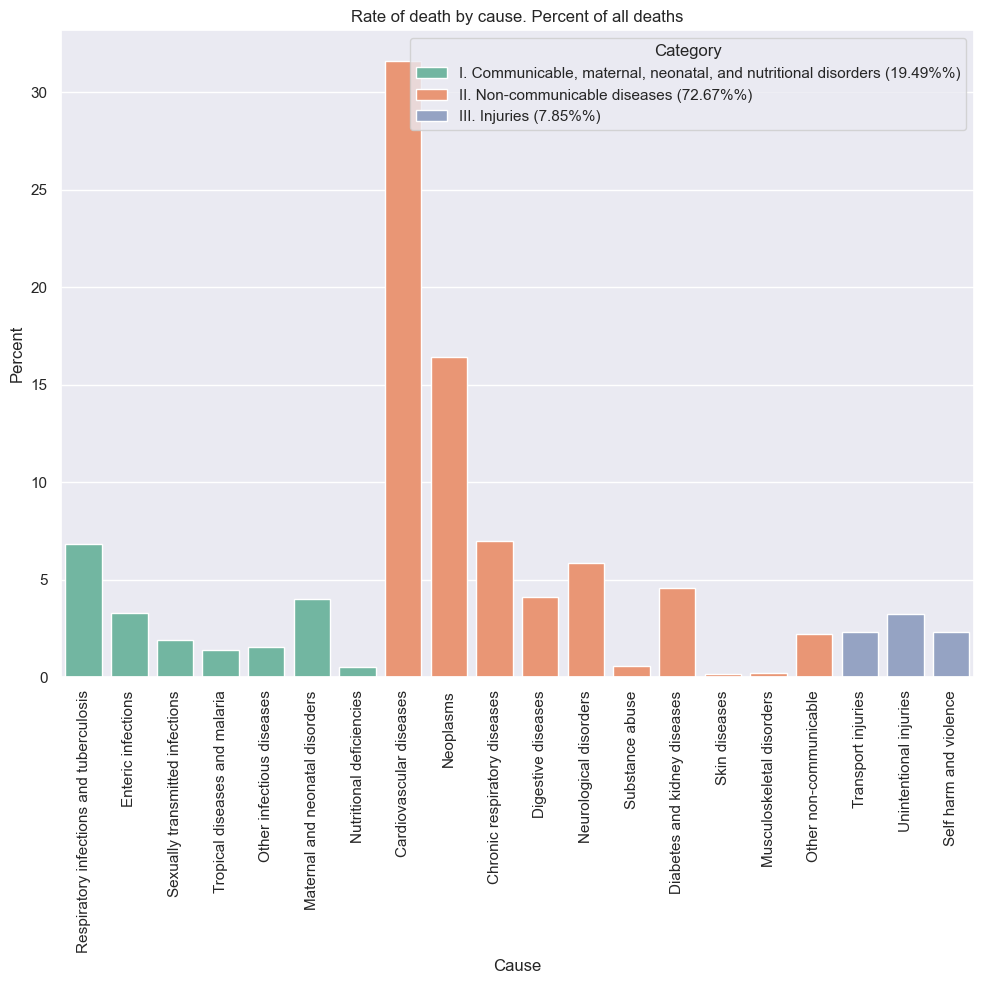

In [83]:
# This creates a new figure for the plot with a specified size (10 by 10 inches).
plt.figure(figsize=(10, 10))

# This creates a bar plot using seaborn (sns).
sns.barplot(x="Cause", y="Percent", hue="Category", data=web_df, palette="Set2", dodge=False)

# This sets the label for the x-axis.
plt.xlabel('Cause')

# This sets the label for the y-axis.
plt.ylabel('Percent')

# This sets the title for the plot.
plt.title('Rate of death by cause. Percent of all deaths')

# This rotates the x-axis labels by 90 degrees, which can make them easier to read if they are long.
plt.xticks(rotation=90)

# This adds a legend to the plot. 
# The 'title' argument sets the title of the legend, and 'loc' sets the location of the legend.
plt.legend(title='Category', loc='upper right')

# This adjusts the layout so that there is enough space for all labels and titles.
plt.tight_layout()

# This displays the plot.
plt.show()

The above graph shows **II. Non-communicable diseases** causes more deaths with **cardiovascular diseases** standing out amongst other causes, accounting for 35% of deaths. I believe in addressing and researching the most common problems first, as solving problems in this order tends to be more effective.

So therefore, I will analyse cardiovascular diseases but my focus will not be on all the cardiovascular diseases as I also believe in researching in depth. So focusing on one heart disease allows for a more in-depth study, which can lead to a better understanding of the disease's mechanisms, treatment options, and potential prevention strategies. This will also makes data collection and analysis more manageable, leading to potentially higher quality and more reliable data. By targeting a single heart disease, interventions can be adapted more precisely, which may result in more impactful health outcomes for the affected population. Also, focusing on one heart disease, especially if it's less researched, can raise public awareness and interest, which is crucial for patient advocacy and fundraising efforts.

From cardiovascular diseases, I decided to do analysation and research on Heart Failure, because Heart failure is a special case within the broad category of cardiovascular diseases. Here's why:

1. **Progressive and Chronic**: Unlike some forms of heart disease that can be stabilized or improved with treatment, heart failure is a progressive disease that tends to worsen over time. While treatments can slow the progression and improve symptoms, they generally cannot cure the condition [2][3].

2. **Complex Management**: Managing heart failure often requires a complex regimen of medications, lifestyle changes, and sometimes surgical procedures. This can include drugs to manage symptoms, reduce fluid buildup, and improve heart function, as well as dietary changes and regular exercise [2][3].

3. **Impact on Quality of Life**: Heart failure can significantly impact a person's quality of life. Symptoms such as fatigue, shortness of breath, and fluid retention can make everyday activities challenging [2][3]. 

4. **High Hospitalization Rates**: Heart failure is one of the leading causes of hospitalization among adults over the age of 65. The condition often requires careful monitoring and frequent medical care [2][3].

5. **Systemic Effects**: Heart failure doesn't just affect the heart. It can lead to a domino effect of complications throughout the body. For example, it can cause fluid buildup in the lungs (pulmonary edema), liver damage or failure, and kidney damage or kidney failure due to reduced blood flow [2][3].

6. **Unique Symptoms**: Heart failure has some unique symptoms not seen in all cardiovascular diseases, such as swelling in the legs, ankles and feet, rapid weight gain from fluid buildup, and an increased need to urinate at night [2][3].

### 2.5 Saving web data as CSV file

I have also saved the cleaned web data used as CSV file, so no need to clean again if use again.

In [84]:
web_df.to_csv('causes_of_death.csv', index=False)

In [85]:
# Load the CSV file & Display the first few rows to verify the data 
web_csv = pd.read_csv('causes_of_death.csv')

web_csv.head()

,Category,Cause,Percent
0,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Respiratory infections and tuberculosis,6.85
1,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Enteric infections,3.31
2,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Sexually transmitted infections,1.88
3,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Tropical diseases and malaria,1.37
4,"I. Communicable, maternal, neonatal, and nutritional disorders (19.49%%)",Other infectious diseases,1.57


## 3. Dataset

### 3.1 Data Introduction

The name of a dataset is heart_failure_clinical_records_dataset.csv. The [Features](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1) in the data set are:

1. **Age**: The age of the patient (in years).
2. **Anaemia**: Indicates whether the patient has anemia (0 for no, 1 for yes).
3. **Creatinine Phosphokinase**: The level of creatinine phosphokinase in the blood (measured in arbitrary units).
4. **Diabetes**: Indicates whether the patient has diabetes (0 for no, 1 for yes).
5. **Ejection Fraction**: The percentage of blood ejected from the heart during each contraction (measured as a numeric value).
6. **High Blood Pressure**: Indicates whether the patient has high blood pressure (0 for no, 1 for yes).
7. **Platelets**: Platelet count in the blood (measured in kiloplatelets/mL).
8. **Serum Creatinine**: The level of serum creatinine in the blood (measured in mg/dL).
9. **Serum Sodium**: The level of serum sodium in the blood (measured in mEq/L).
10. **Sex**: Gender of the patient (0 for female, 1 for male).
11. **Smoking**: Indicates whether the patient is a smoker (0 for no, 1 for yes).
12. **Time**: Follow-up time (in days) since the initial diagnosis.
13. **DEATH_EVENT**: Indicates whether the patient experienced a death event during the follow-up period (0 for no, 1 for yes).

In [44]:
# Detail info of features
column_info_df = pd.read_html("https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1 ")[0]
# Data Cleaning:
# Drop the column that is not needed 
column_info_df.drop('Range', axis =1,inplace = True, errors='ignore' )
# Drop the rows that are not needed
column_info_df.drop([4,7], axis = 0, inplace =True, errors ='ignore')
# Edit the 'Explanation' of the 6th row
column_info_df.loc[6, 'Explanation'] = 'Percentage of blood leaving the heart at each contraction'
column_info_df 

,Feature,Explanation,Measurement
0,Age,Age of the patient,Years
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean
2,High blood pressure,If a patient has hypertension,Boolean
3,Creatinine phosphokinase,Level of the CPK enzyme in the blood,mcg/L
5,Diabetes,If the patient has diabetes,Boolean
6,Ejection fraction,Percentage of blood leaving the heart at each contraction,Percentage
8,Sex,Woman or man,Binary
9,Platelets,Platelets in the blood,kiloplatelets/mL
10,Serum creatinine,Level of creatinine in the blood,mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L


**Why Analyze the Heart Failure Clinical Records Dataset?**
Understanding heart failure is crucial for improving patient outcomes and developing effective treatments. By analyzing this dataset, we can gain insights into factors that contribute to heart failure and identify potential risk factors. Let's explore some reasons why this dataset is valuable:

1. **Clinical Relevance:** The dataset contains clinical records of patients with heart failure, including various features such as age, anemia, creatinine phosphokinase levels, diabetes status, ejection fraction, high blood pressure, platelet counts, serum creatinine, serum sodium, sex, smoking habits, and time of observation. These features provide essential information for understanding heart failure progression and patient outcomes.

2. **Predictive Modeling:** By leveraging machine learning techniques, we can build predictive models to estimate the likelihood of heart failure based on patient characteristics. This can aid in early diagnosis, risk assessment, and personalized treatment planning.

3. **Feature Importance:** Analyzing feature importance helps us identify which factors significantly impact heart failure. For instance, we can explore whether certain conditions (e.g., anemia, high blood pressure) play a more critical role in disease progression.

4. **Treatment Strategies:** Insights from this dataset can guide evidence-based treatment strategies. For example, we can investigate whether specific medications or lifestyle modifications (e.g., smoking cessation) correlate with better outcomes.

**And why I chose this dataset**:

1. **Relevance**: The dataset contains important clinical features that are relevant to heart failure, such as age, anaemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium, sex, smoking, and time. These features can be used to investigate the risk factors and predictors of heart failure.

2. **Binary Outcome Variable**: The dataset includes a binary outcome variable 'DEATH_EVENT', which indicates if the patient deceased during the follow-up period. This makes it suitable for binary classification tasks, survival analysis, and other predictive modeling tasks.

3. **Real-World Data**: The dataset is based on real-world medical data, which can provide valuable insights and has the potential to contribute to the understanding of heart failure.

4. **Accessibility and Format**: The dataset is publicly available. It's also in a convenient format (CSV), which can be easily loaded into most data analysis software.

5. **Size**: With 299 patients, the dataset is not too large to handle, yet it provides enough data to draw statistically significant conclusions.

**A consideration of at least two other datasets and their potential strengths/weaknesses for my chosen research topic**

1. [**Heart Failure Prediction Dataset**](https://github.com/nileshely/Heart-Failure-Prediction)
    - **Strengths**: This dataset contains 918 instances with 12 features related to cardiovascular health, which can facilitate the analysis and prediction of heart disease. It includes information such as the patient's age, sex, chest pain type, resting blood pressure, serum cholesterol levels, fasting blood sugar, resting electrocardiogram results, maximum heart rate achieved, presence of exercise-induced angina, ST depression measured during exercise, and the slope of the peak exercise ST segment. The target variable, "HeartDisease," indicates the presence (1) or absence (0) of heart disease.
    - **Weaknesses**: The dataset might not be diverse enough as it doesn't specify the geographical or ethnic background of the patients. Also, it doesn't include some other potential risk factors like family history of heart disease, obesity, and lifestyle factors (smoking, alcohol consumption, physical activity).

2. [**Cardiovascular Disease dataset from Kaggle**](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)
- **Strengths**: This dataset is quite comprehensive with over 70,000 records of patients. It includes a wide range of features such as age, gender, height, weight, systolic blood pressure, diastolic blood pressure, cholesterol, glucose, smoking, alcohol intake, and physical activity. The target variable is the presence or absence of cardiovascular disease. This large dataset could potentially provide more robust and generalizable models.
- **Weaknesses**: Despite its size and comprehensiveness, this dataset lacks some specific clinical parameters that are often associated with heart failure, such as ejection fraction, serum creatinine, and serum sodium levels. Also, it doesn't include information about the type and severity of the heart disease.

I have also saved these 2 datasets in the directory named **Additional data files that I reference from my notebook**

### 3.2 Aims and objectives

My primary objectives are as follows:

1. **Exploratory Data Analysis (EDA):**
   - Conduct a thorough exploration of the dataset to understand its structure, distributions, and relationships between variables.
   - Visualize key features using histograms, scatter plots, and correlation matrices.
   - Identify any missing values or outliers.

2. **Feature Engineering:**
   - Create new features if necessary (e.g., age groups, BMI, etc.).
   - Handle the variables in columns (e.g., split it into continuous and categorical variables.).

3. **Predictive Modeling:**
   - Split the dataset into training and testing subsets.
   - Build predictive models (e.g., logistic regression, decision trees, random forests) to predict the likelihood of heart failure.
   - Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.

4. **Feature Importance and Interpretability:**
   - Determine which features contribute most significantly to heart failure prediction.

5. **Clinical Insights:**
   - Explore how ejection fraction, serum creatinine, and other clinical parameters impact patient outcomes.

6. **Recommendations for Healthcare Providers:**
   - Summarize findings and provide actionable insights for healthcare professionals.
   - Suggest potential interventions or preventive measures based on the analysis.
   
**Techniques, Libraries, and Tools That I will use and why:**
           
   - Pandas: Utilized for data manipulation and preprocessing. Pandas is ideal for handling tabular data and performing operations like merging, grouping, and cleaning data.
   - Matplotlib and Seaborn: Chosen for visualization due to their versatility and ease of use in creating a wide range of plots. Matplotlib provides basic plotting functionality, while Seaborn offers more advanced statistical plotting.
   - Scikit-learn: Used for machine learning tasks such as model building, evaluation, and feature importance analysis. Scikit-learn's extensive library of algorithms and utilities is highly reliable for predictive modeling.
   - Imbalanced-learn: Used for handling class imbalance with techniques like Random OverSampling. This library is essential for improving model performance on imbalanced datasets.

### 3.3 Ethical considerations and Origin of Data

1 - Ethical considerations:

The dataset used in this project is labeled as a **CC BY 4.0 license**. As such, it can be freely utilized for research purposes as long as the user follow it's terms and conditions.

So I followed the conditions and intructions below to avoid any risks:

1. **Attribution**: 
   - Original source: [Heart Failure Clinical Records dataset sourced from the UCI Machine Learning Repository under CC BY 4.0 license](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

2. **Include License Information**:
   - (CC BY 4.0).
   - "Licensed under CC BY 4.0: [Link to License](https://creativecommons.org/licenses/by/4.0/legalcode)").

3. **Indicate Modifications**:
   - "Modified dataset by data cleaning, processing and feature engineering

4. **Avoid Misrepresentation**:
   - Do not imply endorsement or approval by the original creator(s) beyond what the license allows.
   - Be accurate in your representation of the dataset.
   
2 - Data Authentication (and It's origins):

The data I have used is authentic. [This data was gathered and collected in 2015.](https://www.semanticscholar.org/paper/Machine-learning-can-predict-survival-of-patients-Chicco-Jurman/e64579d8593140396b518682bb3a47ba246684eb), We analyzed a dataset containing the medical records of 299 heart failure patients collected at the [Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

The authors of the this data [**Heart Failure Clinical Records dataset**](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records) are **Davide Chicco** and **Giuseppe Jurman**. The dataset was published in the paper titled "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone" in the journal **BMC Medical Informatics and Decision Making** in 2020. 

## 4. Research Area and Questions

### Research Area:  Health and Medicine

### Research Questions:
My analysis will focus on answering the following research questions:

1. **Which clinical features are most strongly associated with heart failure survival?**
   - I'll explore correlations between features and the target variable (death event) to identify key predictors.

2. **How does age impact heart failure outcomes?**
   - I'll investigate whether older patients are more vulnerable to heart failure.

3. **Is there a difference in survival rates between male and female patients?**
   - I'll examine sex as a potential risk factor.

4. **What role does ejection fraction play in predicting survival?**
   - Ejection fraction represents the percentage of blood leaving the heart during each contraction. I'll assess its significance.
 
The dataset I am analyzing "Heart Failure Clinical Data", is appropriate for the research questions I've posed. Here's why:

1. **Which clinical features are most strongly associated with heart failure survival?**
   - The dataset includes a variety of clinical features such as age, anaemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium, sex, smoking, and time. These features can be correlated with the target variable (death event) to identify key predictors.

2. **How does age impact heart failure outcomes?**
   - The dataset includes 'age' as one of the features, which allows us to investigate the impact of age on heart failure outcomes.

3. **Is there a difference in survival rates between male and female patients?**
   - The 'sex' feature in the dataset will enable us to examine if there's a difference in survival rates between male and female patients.

4. **What role does ejection fraction play in predicting survival?**
   - The dataset includes 'ejection fraction' as a feature. This represents the percentage of blood leaving the heart at each contraction, allowing us to assess its significance in predicting survival.

## 5. Exploratory Data Analysis (EDA)

### 5.1. Loading the Dataset
I'll start by loading the dataset into a Pandas DataFrame, just to verify that the data is accessible and is loading correctly. I used the head() function in Python, which allows me to view the first few rows of the DataFrame.

In [86]:
# Load the CSV file
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Display the first few rows to verify the data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 5.2. Data Structure

Here, I will explore the structure of the dataset: these steps allow us to grasp the dataset’s structure, assess its quality, 
and gain initial insights. As I proceed, I’ll uncover more specific patterns and relationships within the data.

1 - Number of rows and columns

I’ll find out how many rows and columns are in the DataFrame. This would help us Understanding the size of the dataset, Knowing 
the number of rows helps us gauge the dataset’s scale (e.g., small, medium, large) and rhe number of columns informs us about the available attributes (features) for analysis.

In [87]:
# Get the shape (rows, columns) of the DataFrame
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 299
Number of columns: 13


The code above calculates the number of rows and columns in the DataFrame (df).

2 - Data types of each column

I’ll display the data types (e.g., int64, float64, object) for each column. This helps in Identifying the data types for 
each attribute. This Helps us understand whether columns contain numerical data (integers or floats) or categorical data (strings) and guides our choice of appropriate analysis techniques (e.g., mean for numeric data, mode for categorical data).

In [88]:
# Display data types of each column
print(df.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


The output obtained from displaying the data types of each column provides several insights about the dataset:
**Column Types**:
   - Most columns have an integer data type (e.g., "int64"). These columns likely represent numerical features. And some are floats.

### 5.3. Data Checking

Here I will check and review the data to see if data is correct and if there are any missing or duplicated values.

#### 1. **Missing Values (NaN)** and duplication:
   - I'll identify any missing values (NaN) in the DataFrame.
   - If there are any, I can decide how to handle them (e.g., impute with mean, drop rows/columns).

In [89]:
# Check for missing values (NaN) in the entire DataFrame (this chekcs if the sum of values per columns are null or not)
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Alternatively, check if any value is NaN in the entire DataFrame
has_missing_values = df.isna().any().any()
print(f"Has missing values: {has_missing_values}")

Missing values per column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Has missing values: False


In [90]:
# Check for any duplicated values, if any print true, if not then fals.
data_dup = df.duplicated().any()

print(data_dup)

False


My dataset is correct and complete, It does not have any missing values or duplication.

### 5.4. Summarize basic statistics (mean, median, standard deviation and mode)

This code calculates descriptive statistics, which are fundamental for understanding the dataset’s distribution and variability. These insights inform subsequent analysis, model selection, and decision-making.

In [91]:
# Calculate mean, median, and standard deviation for each column
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


The output from above calculating mean, median, and standard deviation for each numerical column provides valuable insights about the dataset:

1. **Age**:
   - The average age of patients in the dataset is approximately 60.8 years.
   - The age range spans from 40 to 95 years.

2. **Anaemia, Diabetes, and High Blood Pressure**:
   - The mean values for these binary features (anaemia, diabetes, and high blood pressure) indicate their prevalence.
   - For example, around 43% of patients have anaemia.

3. **Creatinine Phosphokinase (CPK)**:
   - The average CPK level is approximately 582, with a wide range (from 23 to 7861).
   - High variability suggests diverse CPK levels among patients.

4. **Ejection Fraction**:
   - The mean ejection fraction is 38%, indicating the percentage of blood ejected from the heart during each contraction.
   - Variability in ejection fraction may impact heart function.

5. **Platelets**:
   - The mean platelet count is around 263,358.
   - Platelet levels vary significantly (standard deviation of approximately 97,804).

6. **Serum Creatinine and Sodium**:
   - The mean serum creatinine level is 1.39388.
   - Serum sodium levels average around 136.6 mEq/L.

7. **Sex and Smoking**:
   - I can calculate the number of male and female patients in the dataset.
   - I can also calculate the number of patients who are smokers.

8. **Follow-up Time (Time)**:
   - The median follow-up time is 115 days, with a wide range (from 4 to 285 days).

9. **Death Event**:
   - The mean death event rate is approximately 32%.
   - I could investigate factors associated with higher or lower death rates.

10. **Contextual Interpretation**:
    - These statistics provide context for understanding patient characteristics and potential risk factors.
    - Next up, I will consider how these features relate to heart failure outcomes.

### 5.5 Survival Analysis

Here I will do a quick analysis of all features in dataset and find out which Clinical features are most strongly associated with heart failure survival.

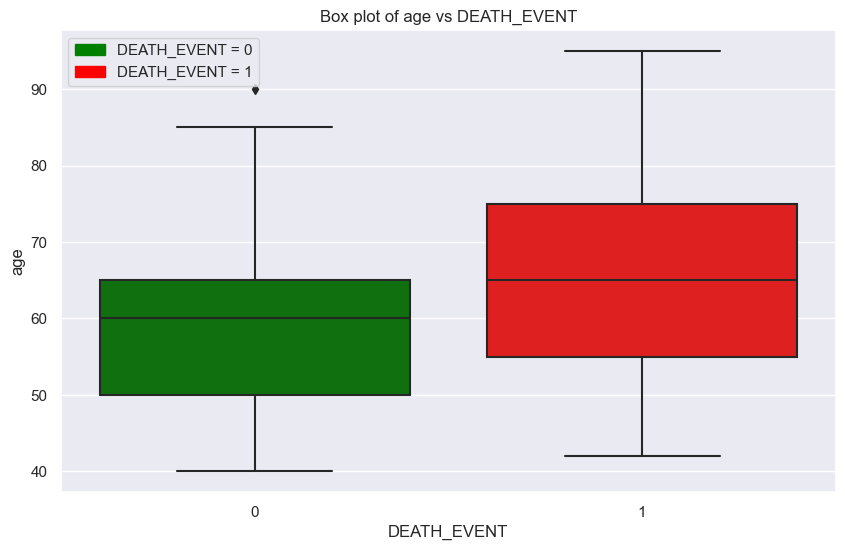

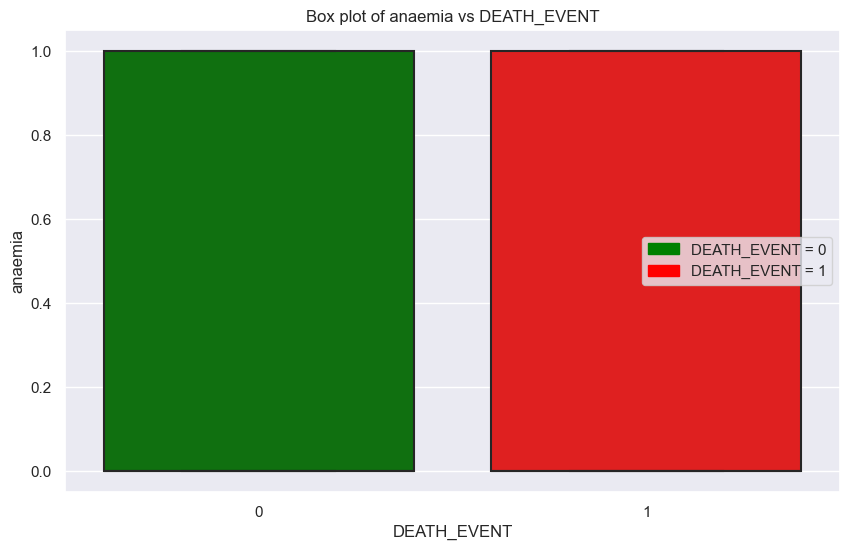

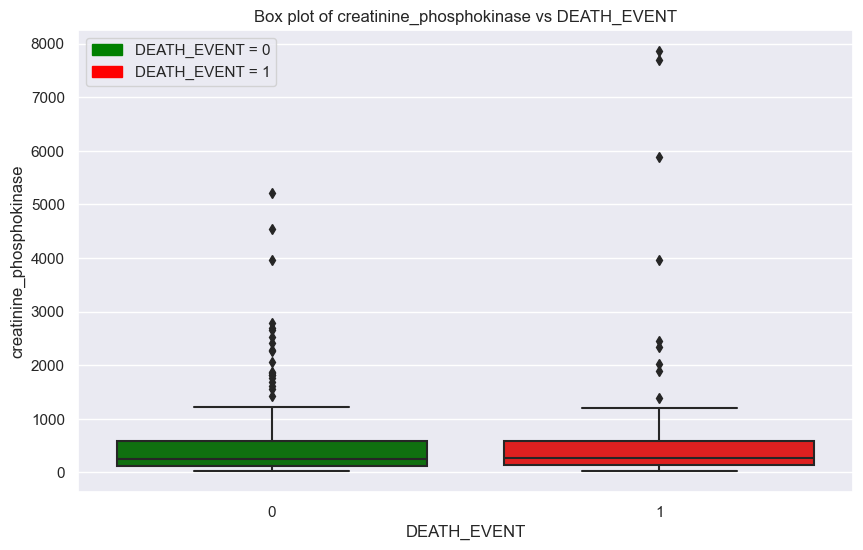

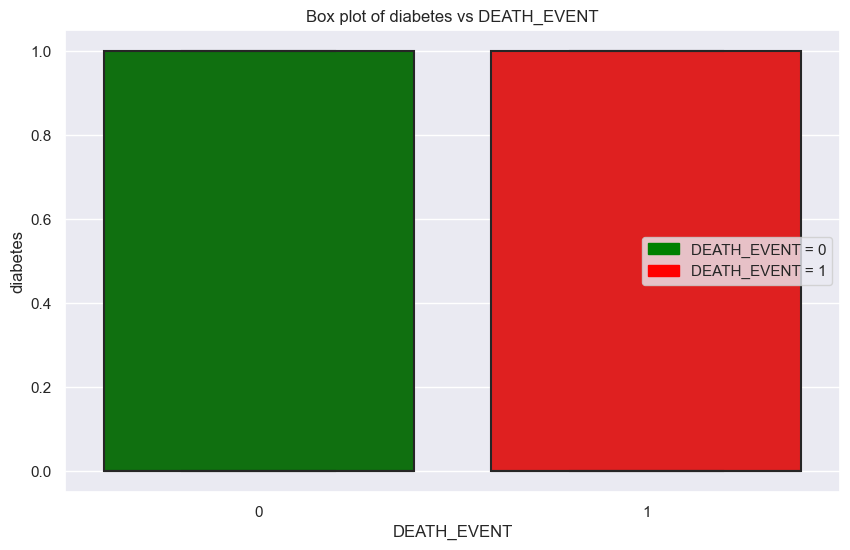

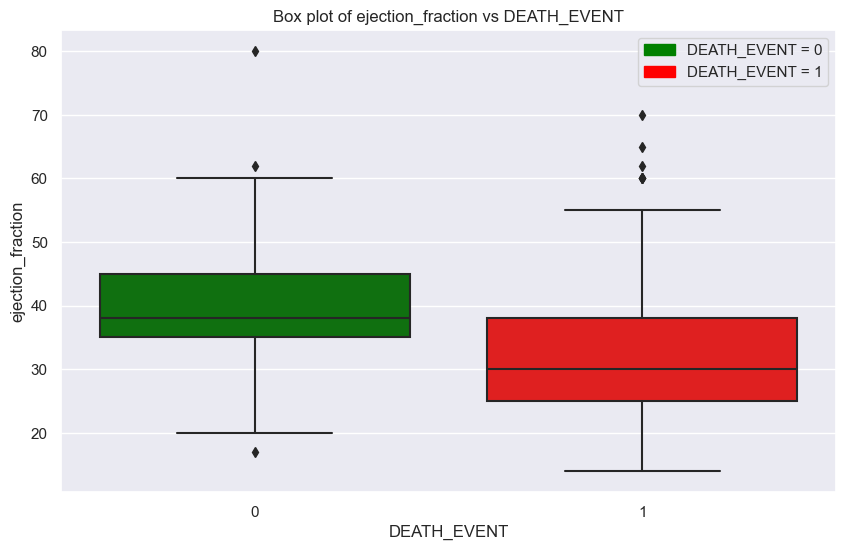

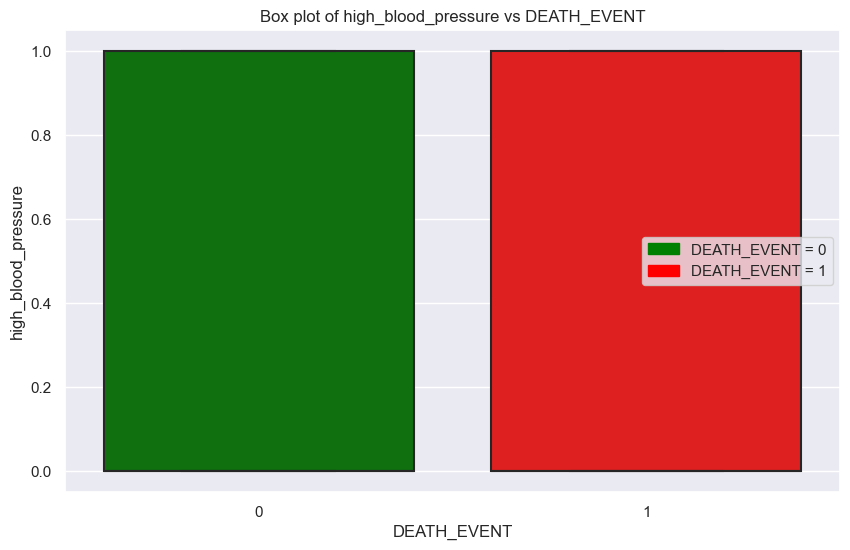

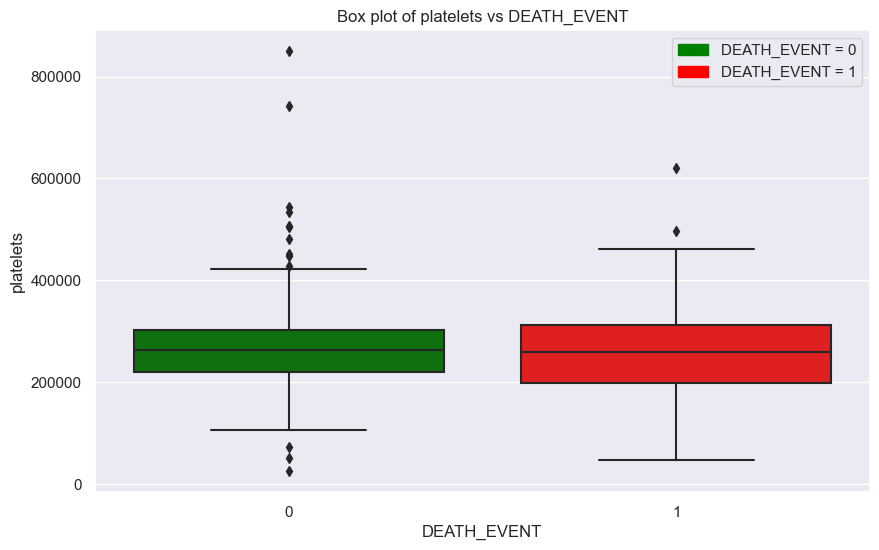

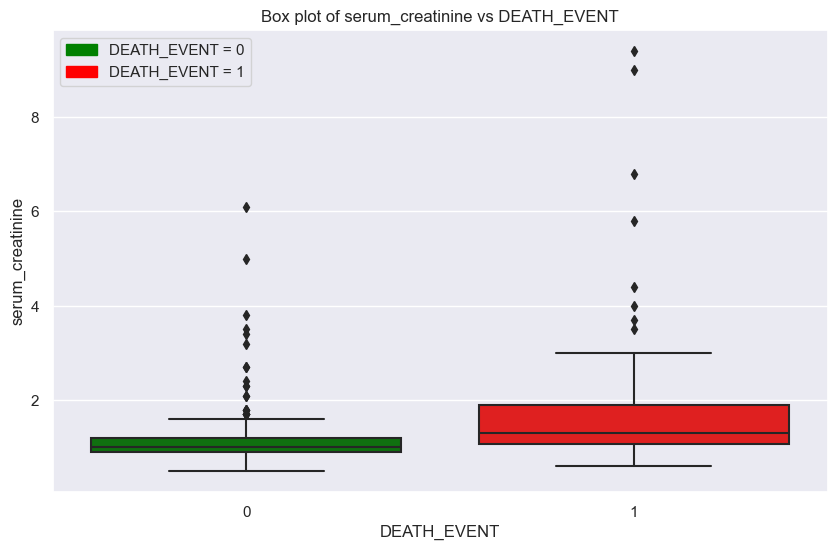

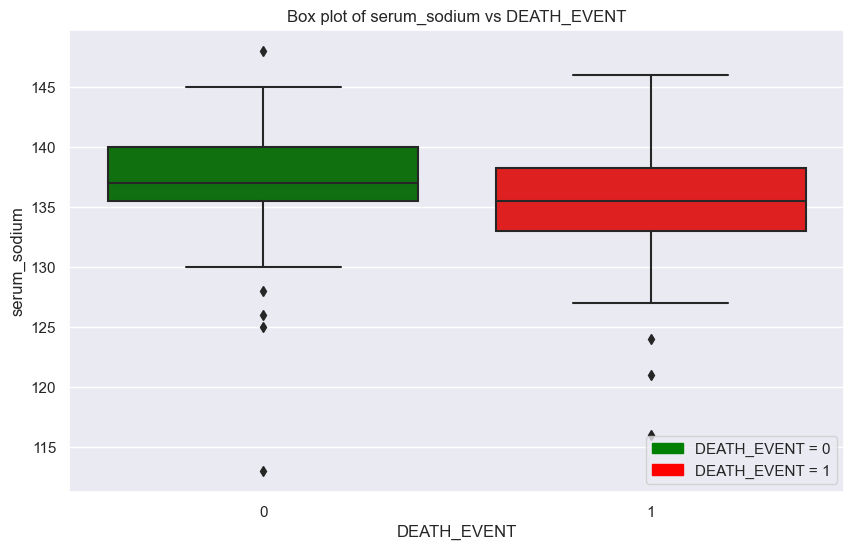

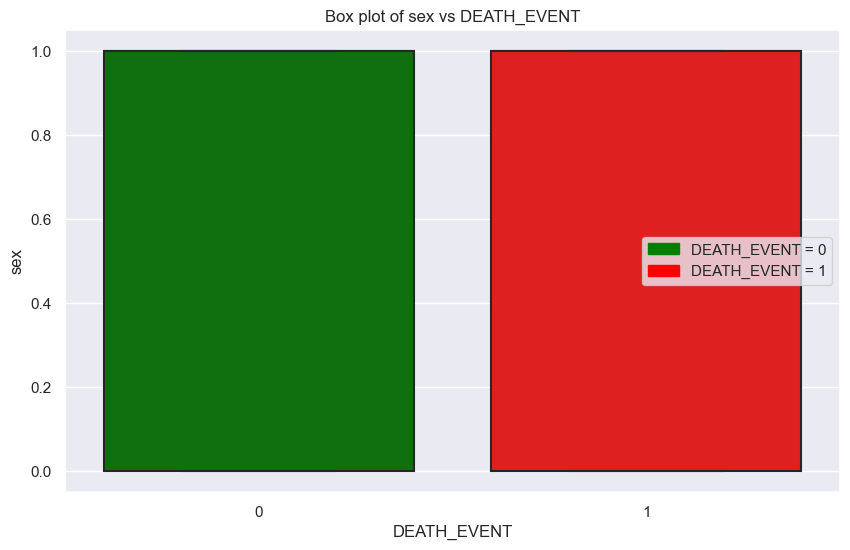

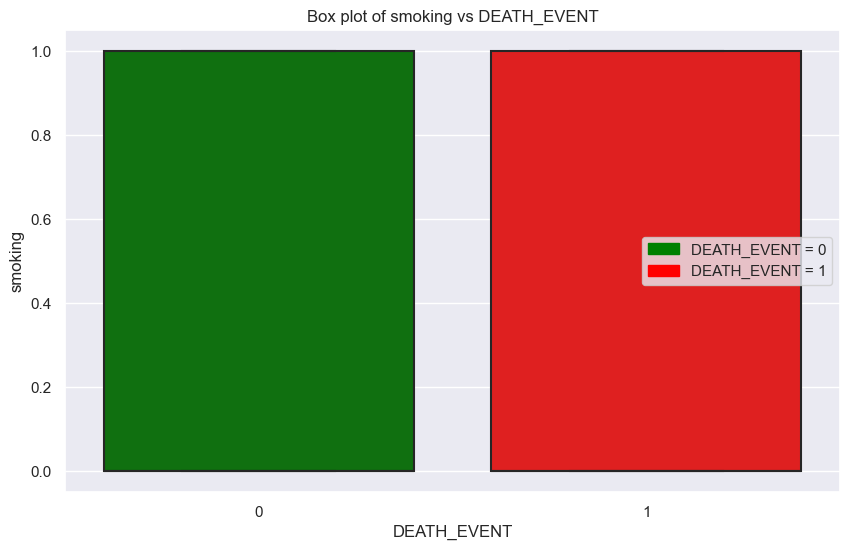

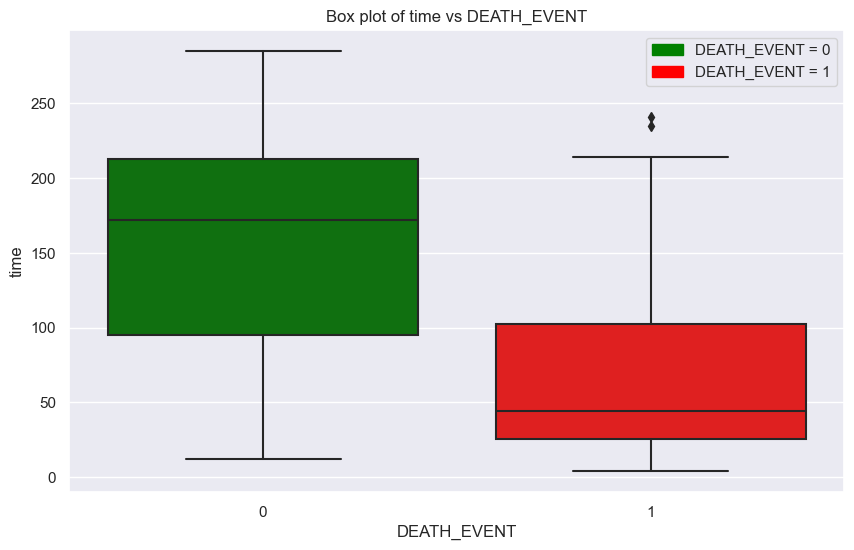

In [92]:
# This creates a list of all the column names in the DataFrame 'df', excluding the last column ('DEATH_EVENT').
# The 'columns' attribute gets the column names
# The '[:-1]' slices the list to exclude the last item.
features = df.columns[:-1]

# This 'for' loop iterates over each item in the 'features' list.
for feature in features:
    # This creates a new figure for the plot with a specified size (10 by 6 inches).
    plt.figure(figsize=(10, 6))
    
    # This creates a box plot using seaborn (sns). 
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df, palette=['green', 'red'])
    
    # This sets the title for the plot. The title is a string that includes the current 'feature' and 'DEATH_EVENT'.
    plt.title(f'Box plot of {feature} vs DEATH_EVENT')
    
    # This creates a custom legend for the plot.
    green_patch = mpatches.Patch(color='green', label='DEATH_EVENT = 0')
    red_patch = mpatches.Patch(color='red', label='DEATH_EVENT = 1')
    plt.legend(handles=[green_patch, red_patch])
    
    # This displays the plot.
    plt.show()

**Age:**

For category 0 (no death event), the median age is around 60 years, with the interquartile range (IQR) extending from roughly 50 to 65 years. There are some outliers indicated above this range.

For category 1 (death event), the median age appears to be higher, about in the mid-60s, with an IQR stretching from near 55 to almost 75 years. This suggests that older ages are more strongly associated with heart failure survival (which means they tend to have a shorter “survival time” ) since there's a shift towards higher ages in the death event group. 

In summary, this box plot indicates that age is a significant factor in heart failure survival. Older patients appear to have a higher risk of death due to heart failure. This is consistent with medical knowledge, as older individuals often have more comorbidities and a lower physiological reserve, making them more vulnerable to heart failure. However, its important to note that correlation does not imply causation, and other factors could also be at play.

**Anemia:**

The median (the line inside the box) for both categories is at 0, indicating that more than half of the patients in both categories do not have anaemia.

In summary, this box plot suggests that anaemia is not strongly associated with the death event in heart failure patients, as the distributions of anaemia are similar in both the death event and no death event groups.

**Creatinine Phosphokinase:**

For category 0 (no death event), the box plot shows that the majority of patients have 'creatinine_phosphokinase' levels below 1000, with some outliers extending up to around 5000. The median (the line inside the box) is relatively low, indicating that more than half of the patients in this category have low levels of 'creatinine_phosphokinase'.

For category 1 (death event), the box plot shows a similar distribution of 'creatinine_phosphokinase' levels, with the majority of patients having levels below 1000 and some outliers extending up to around 8000. The median is also relatively low and similar to that of category 0.

In summary, this box plot suggests that 'creatinine_phosphokinase' levels are not strongly associated with the death event in heart failure patients, as the distributions are similar in both the death event and no death event groups.

**Diabetes:**

The median (the line inside the box) for both categories is at 0, indicating that more than half of the patients in both categories do not have diabetes.

In summary, this box plot suggests that diabetes is not strongly associated with the death event in heart failure patients, as the distributions of diabetes are similar in both the death event and no death event groups.

**Ejection Fraction:**

For category 0 (no death event), the box plot shows that the majority of patients have 'ejection_fraction' levels around 40, with some outliers extending up to around 80. The median (the line inside the box) is relatively high, indicating that more than half of the patients in this category have high levels of 'ejection_fraction'.

For category 1 (death event), the box plot shows a similar distribution of 'ejection_fraction' levels, with the majority of patients having levels around 30 and some outliers extending up to around 70. The median is also relatively low and similar to that of category 0.

In summary, this box plot suggests that 'ejection_fraction' levels are strongly associated with the death event in heart failure patients, as the distributions of 'ejection_fraction' are different in both the death event and no death event groups. Patients with lower ejection fraction levels seem to have a higher risk of death due to heart failure.

**High Blood Pressure:**

The median (the line inside the box) for both categories is at 0, indicating that more than half of the patients in both categories do not have high blood pressure.

In summary, this box plot suggests that high blood pressure is not strongly associated with the death event in heart failure patients, as the distributions of high blood pressure are similar in both the death event and no death event groups.

**Platelets:**

For category 0 (no death event), the box plot shows that the majority of patients have 'platelets' levels around 200000 to 300000, with some outliers extending up to around 800000. The median (the line inside the box) is relatively high, indicating that more than half of the patients in this category have high levels of 'platelets'.

For category 1 (death event), the box plot shows a similar distribution of 'platelets' levels, with the majority of patients having levels around 200000 to 300000 and some outliers extending up to around 800000. The median is also relatively high and similar to that of category 0.

In summary, this box plot suggests that 'platelets' levels are not strongly associated with the death event in heart failure patients, as the distributions of 'platelets' are similar in both the death event and no death event groups.

**Serum Creatinine:**

For category 0 (no death event), the box plot shows that the majority of patients have 'serum_creatinine' levels below 2000, with some outliers extending up to around 5000. The median (the line inside the box) is relatively low, indicating that more than half of the patients in this category have low levels of 'serum_creatinine'.

For category 1 (death event), the box plot shows a similar distribution of 'serum_creatinine' levels, with the majority of patients having levels below 2000 and some outliers extending up to around 8000. The median is also relatively low and similar to that of category 0.

In summary, this box plot suggests that 'serum_creatinine' levels are not strongly associated with the death event in heart failure patients, as the distributions of 'serum_creatinine' are similar in both the death event and no death event groups. 

**Serum Sodium:**

For category 0 (no death event), the box plot shows that the majority of patients have 'serum_sodium' levels around 135 to 140, with some outliers extending below and above this range. The median (the line inside the box) is relatively high, indicating that more than half of the patients in this category have high levels of 'serum_sodium'.

For category 1 (death event), the box plot shows a similar distribution of 'serum_sodium' levels, with the majority of patients having levels around 130 to 138 and some outliers extending below and above this range. The median is also relatively low and similar to that of category 0.

In summary, this box plot suggests that 'serum_sodium' levels are strongly associated with the death event in heart failure patients, as the distributions of 'serum_sodium' are different in both the death event and no death event groups. Patients with lower serum sodium levels seem to have a higher risk of death due to heart failure.

**Sex & Smoking:**

The box plots for these two suggests that 'sex' and 'Smoking' are not strongly associated with the death event in heart failure patients, as the distributions of both are similar in both the death event and no death event groups.

**Time:**

For category 0 (no death event), the box plot shows that the majority of patients have 'time' values around 99 to 250. The median (the line inside the box) is relatively high.

For category 1 (death event), the box plot shows a distribution of 'time' values around 45 to 100, with some outliers extending beyond this range. The median is also relatively low and similar to that of category 0.

In summary, this box plot suggests that 'time' is strongly associated with the death event in heart failure patients, as the distributions of 'time' are different in both the death event and no death event groups. Patients with lower 'time' values seem to have a higher risk of death due to heart failure.

Based on the **box plot analysis of the clinical features**, it appears that **age, ejection fraction, serum sodium levels, and time** are **strongly** associated with heart failure survival. However, **anaemia, creatinine phosphokinase, diabetes, high blood pressure, platelets, sex, and smoking status do not** show a strong association.

### 5.6 Feature Engineering

Here I splited the dataset into two categories to make it easier for analysis.

In [93]:
categorical_variables = df[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

In [94]:
# Print the values to confirm that data has been splited.
categorical_variables.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [95]:
continuous_variables.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


### 5.7 Difference in rates between male and female patients

The code counts the number of males in the dataset. It does this by first filtering the 'categorical_variables' DataFrame to include only rows where 'sex' is 1 (which represents males), then it counts the number of rows in the filtered DataFrame. And then it does the same for females.

In [96]:
# Count the number of males and females
male_count = categorical_variables[categorical_variables['sex'] == 1]['sex'].count()
female_count = categorical_variables[categorical_variables['sex'] == 0]['sex'].count()
male_count # Display

194

In [97]:
female_count # Display

105

As we can clearly see, only 105 of the heart failure patients were female in our observation. This means that I have more number of male patients when compared to females in the dataset. So, we can easily say that this dataset is slightly imbalanced.

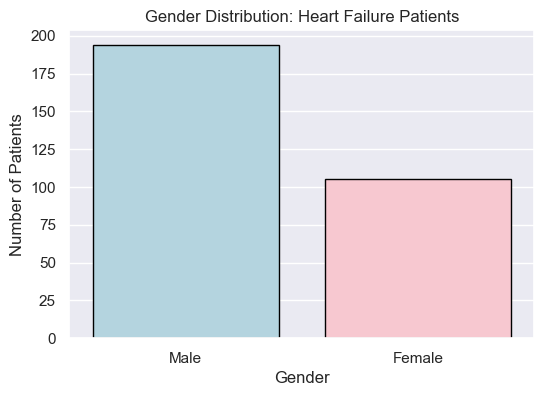

In [98]:
# Create a new DataFrame with the counts (To avoid warnings)
gender_counts = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [male_count, female_count]
})

# # This line creates a new figure for the plot with a specified size (6 by 4 inches).
plt.figure(figsize=(6, 4))

# This line creates a bar plot using seaborn (sns). The data is taken from the 'gender_counts' DataFrame.
sns.barplot(x='Gender', y='Count', data=gender_counts, edgecolor='black', palette =['lightblue', 'pink'])

# This line sets the label for the x-axis.
plt.xlabel('Gender')

# This line sets the label for the y-axis.
plt.ylabel('Number of Patients')

# This line sets the title for the plot.
plt.title('Gender Distribution: Heart Failure Patients')

plt.show()

It is well known that most of the time more males suffer from heart failure than female but knowing the diffierence in how much more is important because recognizing that heart failure manifests differently in men and women allows healthcare providers to adapt treatment plans. Gender-specific interventions can improve outcomes and reduce the risk of complications. Knowing the differences helps identify risk factors unique to each gender, for example, women may be more susceptible to certain conditions (e.g., Takotsubo cardiomyopathy) due to hormonal factors or reproductive history. Understanding these survival differences informs prognosis discussions and patient management.

As seen from memale_count and female_count, the total male patients are 194 and females are 105, there are 89 males more. Lets represent this difference in percentage and display it in pie chart.

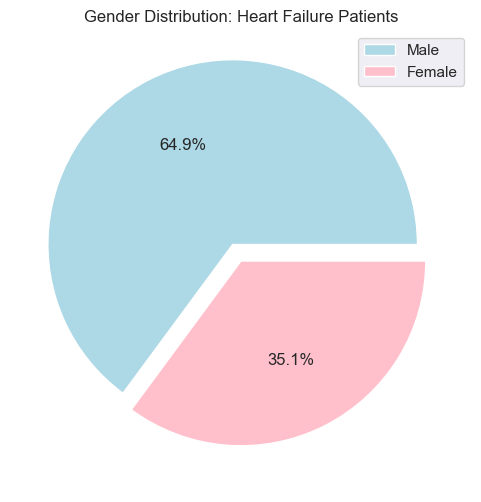

In [99]:
# Calculate the percentage of males and females
# This calculates the total count of patients by adding the count of males and females.
total_count = male_count + female_count

# This calculates the percentage of male patients. 
# It does this by dividing the count of males by the total count and then multiplying by 100 to get the percentage.
male_percentage = (male_count / total_count) * 100

# And then same for females
female_percentage = (female_count / total_count) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))

# autopct='%1.1f%%' means that the pie chart labels will be displayed with a precision of 1 decimal place.
plt.pie([male_percentage, female_percentage], autopct='%1.1f%%',  explode=[0.1, 0], colors = ['lightblue', 'pink']) 

plt.legend(['Male', 'Female'], loc='upper right')

plt.title('Gender Distribution: Heart Failure Patients')

plt.show()

As seen from above, males are 29.8% more than females at most.

- Difference in survival rates between male and female patients

Here I will find out the overall distributon in the likelihood of survival between individuals of different genders who are afflicted with a Heart failure.

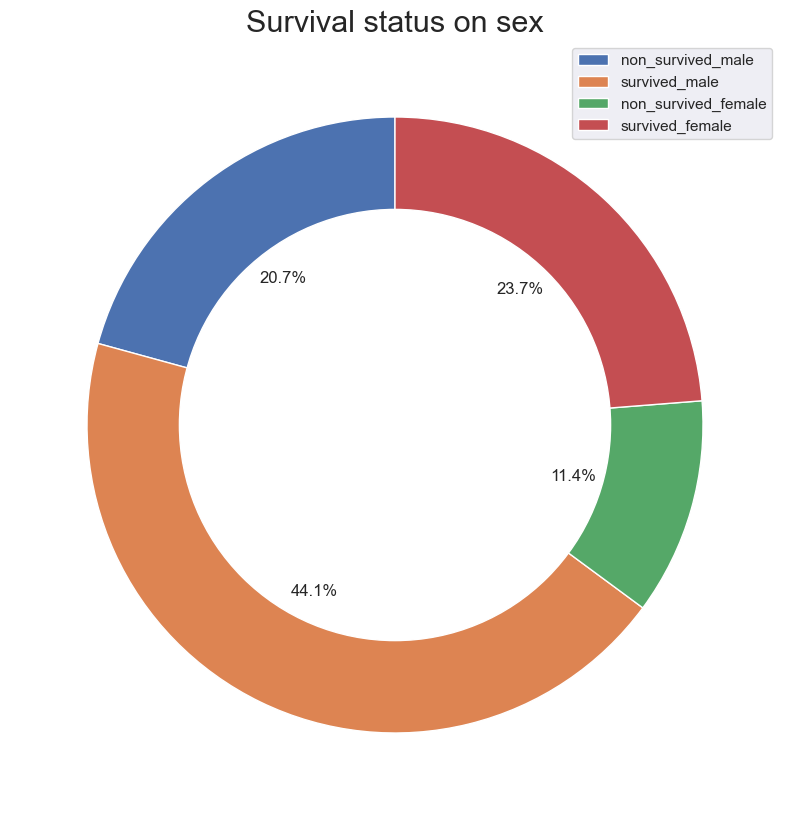

In [100]:
# [7] Note: This code is not mine but I adapted and modified the code such as adding a legend, wrote comments and analysations by myself

# This filters the 'df' DataFrame to include only rows where 'sex' is 1 (which represents males), 
# and assigns the resulting DataFrame to 'male'.
male = df[df["sex"]==1]
female = df[df["sex"]==0] # Same process for females

# These lines filter the 'male' and 'female' DataFrames to include only rows where 'DEATH_EVENT' is 1 
# (which represents non-survival) or 0 (which represents survival), and assigns the resulting DataFrames to 
# 'non_survived_male', 'survived_male', 'non_survived_female', and 'survived_female' respectively.
non_survived_male = male[male["DEATH_EVENT"]==1]
survived_male = male[male["DEATH_EVENT"]==0]
non_survived_female = female[female["DEATH_EVENT"]==1]
survived_female = female[female["DEATH_EVENT"]==0]

# This line creates a list 'sex_data' with the counts of non-survived males, survived males, non-survived females, 
# and survived females.
sex_data = [len(non_survived_male), len(survived_male), len(non_survived_female),len(survived_female)]

# This line creates a new figure for the plot with a specified size (10 by 10 inches).
plt.figure(figsize=(10,10))

# This line creates a pie chart using matplotlib (plt). 
# The data is taken from the 'sex_data' list, and the labels are taken from the 'sex_labels' list. 
# The 'autopct' argument is used to format the percentage labels for each wedge,  
#'startangle' rotates the start of the pie chart by 90 degrees.
plt.pie(sex_data, autopct='%.1f%%', startangle=90)

# These lines create a white circle at the center of the pie chart, effectively turning the pie chart into a donut chart.
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)

plt.legend(["non_survived_male","survived_male","non_survived_female","survived_female"], loc='upper right')

plt.title("Survival status on sex", fontsize=22)

plt.show()

Based on the donut chart above, which represents the survival status of individuals by gender in the context of heart failure:

1. **Survival Disparities:**
   - The largest segment represents **survived males** at 44.1%.
   - The second segment represents **survived females** at 23.7%.
   - The third largest segment represents **non-survived males** at 20.7%.
   - The smallest segment represents **non-survived females** at 11.4%.

2. **Observation:**
   - A higher percentage of males have survived compared to females, as there are more males in the dataset.
   - Additionally, there are more non-surviving males than non-surviving females.
   - Overall, there are more surviving patients (67.8%) then non-surviving patients (32.1%). 

In conclusion, we can see that even if the dataset is imbalanced with gender, still there are more males who die (20.7%) from this conditon than females (11.4%).

Next, I will calculate the survival of males and females. The first line of code below calculates the survival rate for males. It does this by first filtering the 'df' DataFrame to include only rows where 'sex' is 1 (which represents males) and 'DEATH_EVENT' is 0 (which represents survival). The .shape[0] gives the number of such rows. This count is then divided by the total number of males in the DataFrame to get the survival rate.

Then it does the same process with females

In [101]:
# Calculate survival rates for males and females
male_survival_rate = df[(df['sex'] == 1) & (df['DEATH_EVENT'] == 0)].shape[0] / df[df['sex'] == 1].shape[0]
female_survival_rate = df[(df['sex'] == 0) & (df['DEATH_EVENT'] == 0)].shape[0] / df[df['sex'] == 0].shape[0]

# Display the survival rates
print("Survival rate for males:", male_survival_rate)
print("Survival rate for females:", female_survival_rate)

# Compare the survival rates
if male_survival_rate > female_survival_rate:
    print("Males have a higher survival rate.")
elif female_survival_rate > male_survival_rate:
    print("Females have a higher survival rate.")
else:
    print("Survival rates are equal for males and females.")


Survival rate for males: 0.6804123711340206
Survival rate for females: 0.6761904761904762
Males have a higher survival rate.


Next, I will analyse and count the number of deaths in males and females.

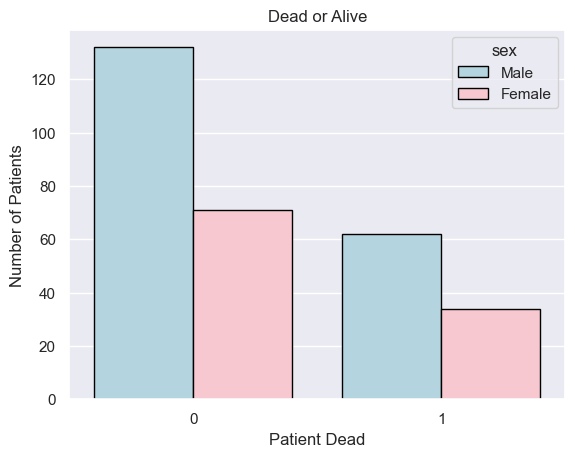

In [102]:
# Create a copy of the original DataFrame to avoid modifying it
df_copy = df.copy()

# Replace the binary values in the 'sex' column with 'Female' and 'Male'
# 0 is replaced with 'Female' and 1 is replaced with 'Male'
df_copy['sex'] = df_copy['sex'].replace({0: 'Female', 1: 'Male'})

# Create a countplot using seaborn (sns)
# 'DEATH_EVENT' is on the x-axis and 'sex' is used for hue (color coding)
# edgecolor argument is used to set and colour the outline
# The palette argument is used to specify the colors for the bars
sns.countplot(x = df_copy['DEATH_EVENT'], hue = df_copy['sex'], edgecolor='black', palette =['lightblue', 'pink'])

# Set the title for the plot
plt.title('Dead or Alive')

# Set the label for the x-axis
plt.xlabel('Patient Dead')

# Set the label for the y-axis
plt.ylabel('Number of Patients')

# Display the plot
plt.show()

In conclusion, from count plot, from the percentages donut chart and non-Survival/Survival rate, we can see that there are more males than females in the total population of the dataset. Therefore, both the survival and non-survival rates for males are higher than those for females.

The number of males who are alive is higher but the number of males who did not survived is also higher from my analysis, which got validated by a fact that males suffer or die more from heart failure. One reaseon for this gender imbalance in my dataset could be the very fact that males suffer more from heart failure, so it is obvious that the number of males started decreasing in the dataset.

Understanding this is important, because If this dataset is from a scenario where survival is critical (like a medical treatment or a disaster), it can help inform future decisions and strategies. For example, if one group has a lower survival rate, efforts could be made to provide more support to that group.

### 5.8 Age Analysis

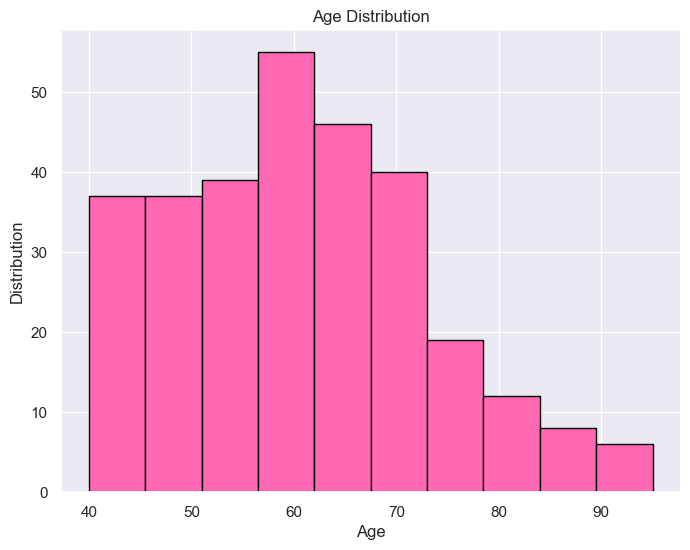

In [103]:
# This selects the 'age' column from the 'continuous_variables' DataFrame and assigns it to the variable 'ages'.
ages = continuous_variables['age']

# This creates a new figure for the plot with a specified size (8 by 6 inches).
plt.figure(figsize=(8, 6))

# This creates a histogram using matplotlib (plt). 
# The data is taken from the 'ages' variable. The 'bins' argument sets the number of bins in the histogram, 
# and the 'color' and 'edgecolor' arguments set the color of the bars and their edges respectively.
plt.hist(ages, bins=10, color='hotpink', edgecolor='black')

plt.xlabel('Age')

plt.ylabel('Distribution')

plt.title('Age Distribution')

plt.show()

From the above histogram plot, we observe that the data for patients is normally distributed. The highest age of patients is with highest distribution which is around 60 to 65 of age, which approximately aligns with both the mean and median age calculated in **3.3. Summarize basic statistics (mean, median, standard deviation and mode)**. After that, it is observed that it decreases.

The life expectancy of a person in Pakistan in 2015 was approximately 67 years. It's obvious that the number of patients recorded starts declining from 65-70 age group. [You can see the complete list of life expectancy of people in Pakistan (1950 - 2024) from here.](https://www.macrotrends.net/global-metrics/countries/PAK/pakistan/life-expectancy)

The majority of patients fall within the age range of 40 to 95 years old. Based on this, I will categorize the age into three groups: young, elderly (middle-aged), and old. I will perform this categorization using **Feature Engineering**. Then I will count the number of each age groups. [8]

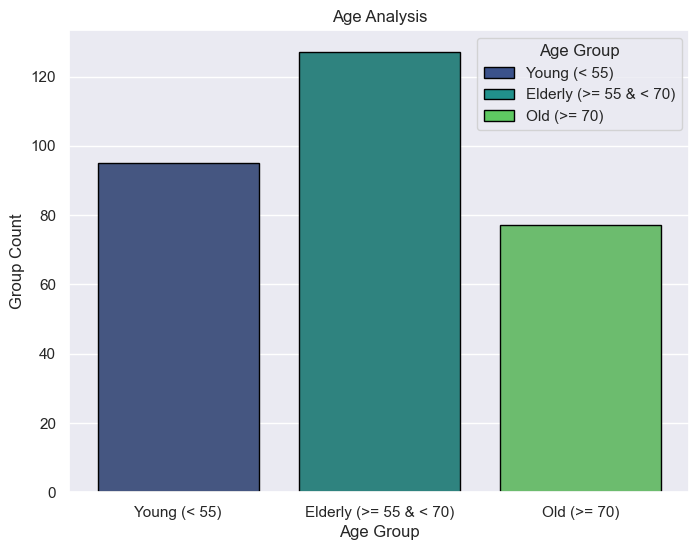

In [104]:
# These lines filter the 'continuous_variables' DataFrame to include only rows where conditions in the code are satisfied. 
young = continuous_variables[ages < 55]
elderly = continuous_variables[(ages >= 55) & (ages < 70)]
old = continuous_variables[ages >= 70]

# This line creates a new DataFrame 'groups' with the age groups and their counts. The age groups are defined 
# and their counts are calculated as the number of rows in 'young', 'elderly', and 'old' respectively.
groups = pd.DataFrame({
    'age_group': ['Young (< 55)', 'Elderly (>= 55 & < 70)', 'Old (>= 70)'],
    'group_count': [len(young), len(elderly), len(old)]
})

# This creates a new figure for the plot with a specified size (8 by 6 inches).
plt.figure(figsize=(8, 6))

# This generates a color palette with the same number of colors as there are groups.
colors = sns.color_palette('viridis', n_colors=len(groups))

# This creates a bar plot using seaborn (sns).
# The data is taken from the 'groups' DataFrame.
sns.barplot(x='age_group', y='group_count', data=groups, palette=colors, edgecolor='black')

plt.title('Age Analysis')

# These lines set the labels for the x-axis and y-axis.
plt.xlabel('Age Group')
plt.ylabel('Group Count')

# These lines create a legend for the plot. A bar of each color is created and labeled with the corresponding age group. 
# The bars are not visible in the plot because their x and y coordinates are set to 0.
for i, label in enumerate(groups['age_group']):
    plt.bar(0, 0, color=colors[i], label=label, edgecolor='black')

# This adds the legend to the plot with the title 'Age Group'.
plt.legend(title='Age Group')

plt.show()

Let's analyze the insights from above:
   - The majority of individuals fall into the "Elderly" category, as indicated by the tallest bar.
   - The "Young" group has a moderate count, while the "Old" group has the fewest individuals.

Now I will write code to count the number of deaths in each age to represent it in histogram.

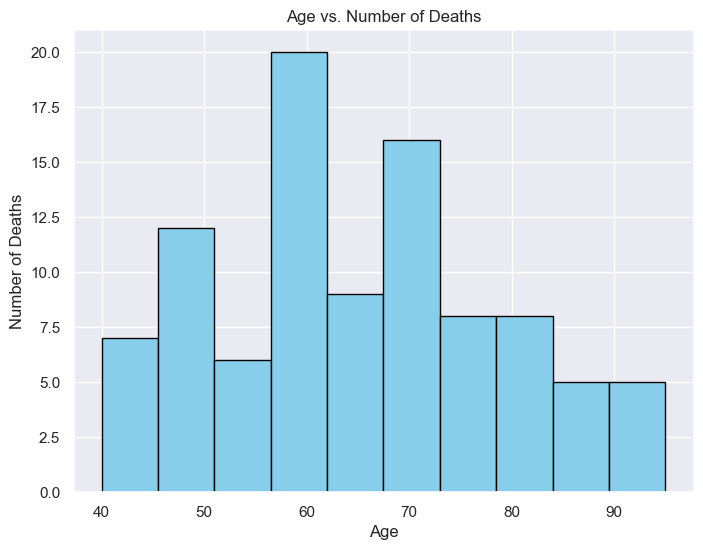

In [105]:
# Group by age and count the number of deaths
age_deaths = df.groupby("age")["DEATH_EVENT"].sum()
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(age_deaths.index, bins=10, weights=age_deaths.values, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.title("Age vs. Number of Deaths")
plt.show()

In the above histogram, from the start it has no deaths then it increases and the highest number of deaths is in age 60. Then after that, it drops gradually. Next, I will create a histogram in more deatail by counting the number of alive patients along with deceased patients.

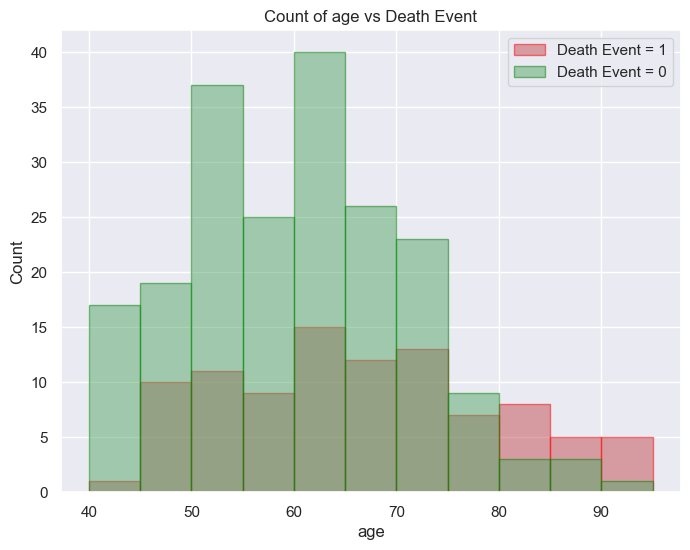

In [106]:
# Create bins for age with a difference of 5 years
bins = np.arange(ages.min(), ages.max() + 5, 5)

plt.figure(figsize=(8, 6))

# For death event = 1
plt.hist(df[df['DEATH_EVENT'] == 1]['age'], bins=bins, alpha=0.5, label='Death Event = 1', color='r', edgecolor='red')

# For death event = 0
plt.hist(df[df['DEATH_EVENT'] == 0]['age'], bins=bins, alpha=0.5, label='Death Event = 0', color='g', edgecolor='green')

plt.xlabel('age')
plt.ylabel('Count')
plt.title('Count of ' + 'age' + ' vs Death Event')
plt.legend(loc='upper right')
plt.show()

The above histogram give us some insights about age analysis. Eventhough the number of death event decreases in old age, the number of non-death events (alive patient) also decrease. The number of patients died is more than alive patients from age 80 and so on. This validated my findings with **5.5 Survival Analysis** where it says older patients are more likely to have a shorter survival time.

Death events is more normally distributed than non-death events which fluctuates, non-death events is the hightest around 65 of age then it drops.

Now I will draw a donut chart of different age groups to see their distribution in percentage.

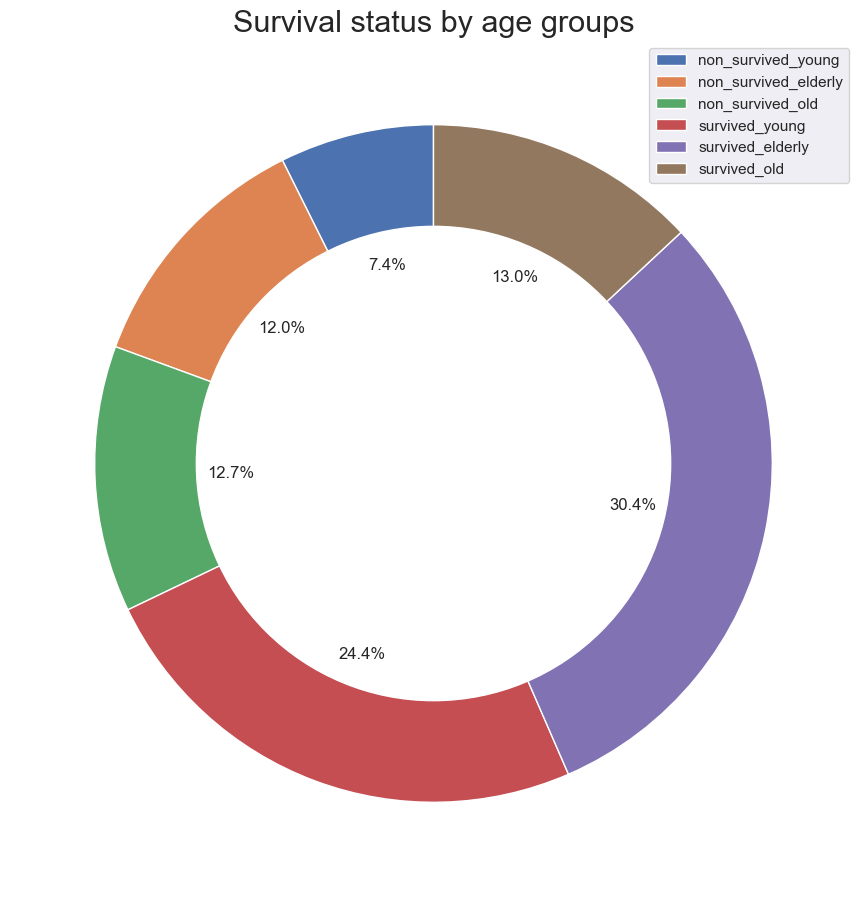

In [107]:
# This code is mine which I learned to do from [7]
# These lines filter the 'df' DataFrame to include only rows where 'age' satisfies the conditions in code below, 
# and 'DEATH_EVENT' is 1 (which represents non-survival). 
# The len() function is used to count the number of such rows. 
# These counts are assigned to 'young_death_event', 'elderly_death_event', and 'old_death_event' respectively.
young_death_event = len(df[(df['age'] < 55) & (df['DEATH_EVENT'] == 1)])
elderly_death_event = len(df[(df['age'] >= 55) & (df['age'] < 70) & (df['DEATH_EVENT'] == 1)])
old_death_event = len(df[(df['age'] >= 70) & (df['DEATH_EVENT'] == 1)])

# These lines do the same as the previous lines, but for rows where 'DEATH_EVENT' is 0 (which represents survival). 
# These counts are assigned to 'young_survived', 'elderly_survived', and 'old_survived' respectively.
young_survived = len(df[(df['age'] < 55) & (df['DEATH_EVENT'] == 0)])
elderly_survived = len(df[(df['age'] >= 55) & (df['age'] < 70) & (df['DEATH_EVENT'] == 0)])
old_survived = len(df[(df['age'] >= 70) & (df['DEATH_EVENT'] == 0)])

# This line creates a list 'age_groups_data' with the counts of non-survived and survived patients in each age group.
age_groups_data = [young_death_event, elderly_death_event, old_death_event, young_survived, elderly_survived, old_survived]

# This line creates a new figure for the plot with a specified size (11 by 11 inches).
plt.figure(figsize=(11, 11))

# This line creates a pie chart using matplotlib (plt).
plt.pie(age_groups_data, autopct='%.1f%%', startangle=90)

# These lines create a white circle at the center of the pie chart, effectively turning the pie chart into a donut chart.
circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)

plt.legend(["non_survived_young", "non_survived_elderly", "non_survived_old", "survived_young", "survived_elderly", 
            "survived_old"], loc='upper right')

# This line sets the title for the plot.
plt.title("Survival status by age groups", fontsize=22)

plt.show()

Survival rate (from smallest % to largest)
- Non-survived young: 7.4%
- Non-survived elderly: 12.0%
- Non-survived old: 12.7%
- Survived old: 13.0%
- Survived young: 24.4%
- Survived elderly: 30.4%

These percentages tell us about the **distribution** of different age groups and their survival status in my dataset. The chart highlights that survival rates differ across age groups. Non-survivors are more evenly distributed between the elderly and old age groups. Or (other than distribution) This tell us the **survival rates** across different age groups:

1. **Young Group Survival**: The survival rate of the young group is significantly higher than their non-survival rate (24.4% vs 7.4%). This could indicate that the young group has a higher chance of survival.

2. **Elderly Group Survival**: The elderly group has the highest survival rate at 30.4%, which is more than double their non-survival rate (12.0%). This suggests that the elderly group has a higher survival rate compared to other groups.

3. **Old Group Survival**: The survival and non-survival rates for the old group are almost similar (13.0% vs 12.7%). This could indicate that the survival outcome for the old group is more uncertain compared to the young and elderly groups.

4. **Overall Survival Trend**: The survival rate increases from the young to the elderly group. This could suggest that age is a significant factor in survival, with the elderly having the highest chance of survival.

In conclusion, the old age group had the lowest survival rate both among non-survivors and survivors, suggesting that they were less likely to survive compared to the other age groups in both cases. 

### 5.9 Smoking
Here I will find out Whether specific lifestyle or treatments like smoking cessation correlates with better outcomes and find out the difference in survial rate of smokers vs non-smokers.

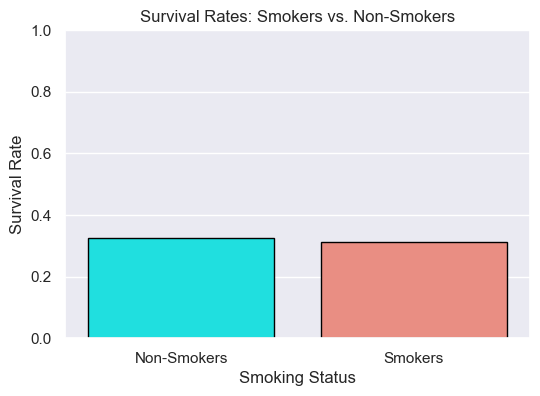

In [108]:
# This line assigns the column name 'smoking' to the variable 'smoking_column'.
smoking_column = 'smoking'

# This groups the 'df' DataFrame by the 'smoking' column and calculates the mean of the 'DEATH_EVENT' column for each group. 
# result is a Series where the index is the unique values in the 'smoking' column and the values are the corresponding means.
survival_rates = df.groupby(smoking_column)['DEATH_EVENT'].mean()

# Create a bar plot
plt.figure(figsize=(6, 4))

# The x-axis represents the unique values in the 'smoking' column, and the y-axis represents the corresponding means.
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette=['cyan', 'salmon'], edgecolor='black')

plt.xlabel('Smoking Status')
plt.ylabel('Survival Rate')

plt.title('Survival Rates: Smokers vs. Non-Smokers')

# This replaces the x-axis tick labels with 'Non-Smokers' and 'Smokers'. 
# The [0, 1] corresponds to the unique values in the 'smoking' column.
plt.xticks([0, 1], ['Non-Smokers', 'Smokers'])

# This line sets the limits of the y-axis to be between 0 and 1.
plt.ylim(0, 1)

plt.show()

As seen in the above graph, there is surprisingly a slight difference. Survival rate of non-smokers is slightly higher than smokers. Now to observe the distribution of smokers and non-smokers along with their survival and non-survival status, I will make a donut chart.

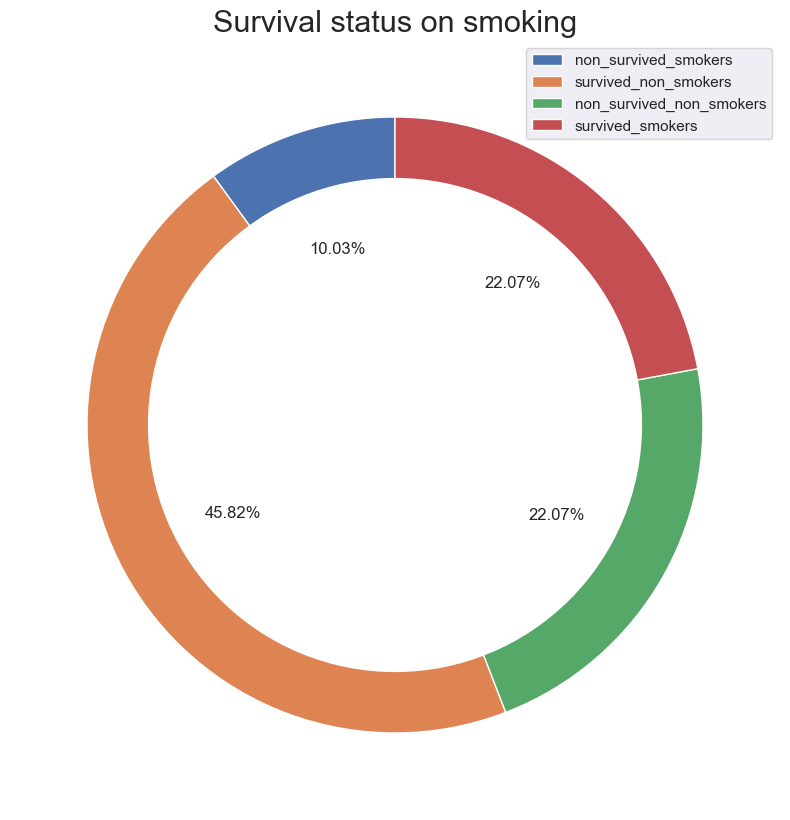

In [109]:
# [7] Note; this code is also not mine but I made changes and wrote comments and did analysations myself.
# (I did not write comments in this code as it does the same thing it did in previous donut chart codes) 

smokers = df[df["smoking"]==1]
non_smokers = df[df["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers), len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]

plt.figure(figsize=(10,10))
plt.pie(smoking_data, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"], loc='upper right')
plt.title("Survival status on smoking", fontsize=22)
plt.show()

From the above donut chart it mostly tells us the distribution and also the survival rate, we can see that:
- survival rate of non-smoker (45.82%) is almost twice the survival rate of smokers (22.07%).
- non-smokers non-survival rate (22.07%) is higher than non-survival rate of smokers (10.3%), which means that more non-smokers did not survivied than smokers. 

**Advices for health professionals**
   - Highlight the significant difference in survival rates between smokers and non-smokers.
   - Emphasize the potential health benefits of quitting smoking.
   - Regularly assess patients' smoking status and provide personalized risk assessments.
   - Consider additional preventive measures for non-smokers.
   - Address risk factors beyond smoking, such as hypertension, diabetes, and anemia.
   - Educate patients about the impact of smoking on heart health.
   - Raise awareness about the increased risk of adverse outcomes for non-smokers as well.
   - Consider personalized approaches for smokers and non-smokers to optimize outcomes.

### 5.10 Categorical Data
Here I will visualize and analyse the rest of Categorical values

In [110]:
categorical_variables.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


As seen from the output obove, there is anaemia	diabetes high_blood_pressure sex smoking. Sex and smoking already has been analysed before so then I will remove these two by making a copy of categorical_variables. I will do this using **data preprocessing and data cleaning**.

In [111]:
categorical_var_copy = categorical_variables.copy() # Create a copy of the original dataframe and modify it

# Remove 'sex' and 'smoking' columns from the copy
categorical_var_copy = categorical_var_copy.drop(columns=['sex', 'smoking'])

categorical_var_copy.head() # to confirm

,anaemia,diabetes,high_blood_pressure
0,0,0,1
1,0,0,0
2,0,0,0
3,1,0,0
4,1,1,0


The code below starts a for loop that iterates over each element in the 'categorical_var_copy' list. The enumerate() function is used to get both the index (i) and the value (categorical_copy) of each element.

Then it prints the index and value of each element in the 'categorical_var_copy' list. The index is represented by 'i' and the value is represented by 'categorical_copy'.

In [112]:
for i,categorical_copy in enumerate(categorical_var_copy):
    print(i, categorical_copy)

0 anaemia
1 diabetes
2 high_blood_pressure


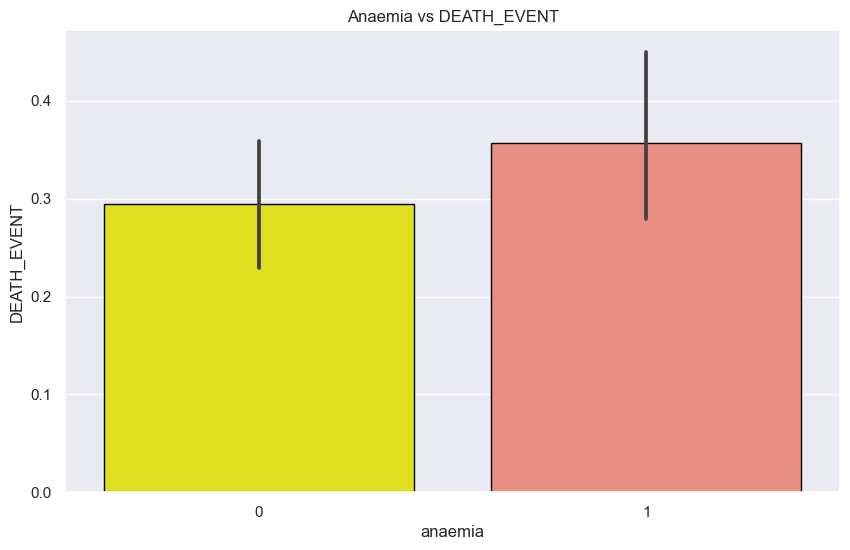

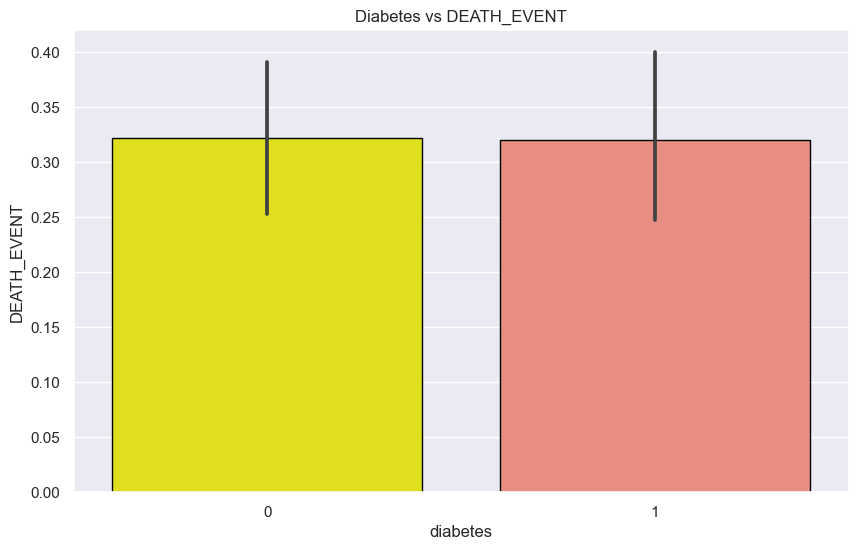

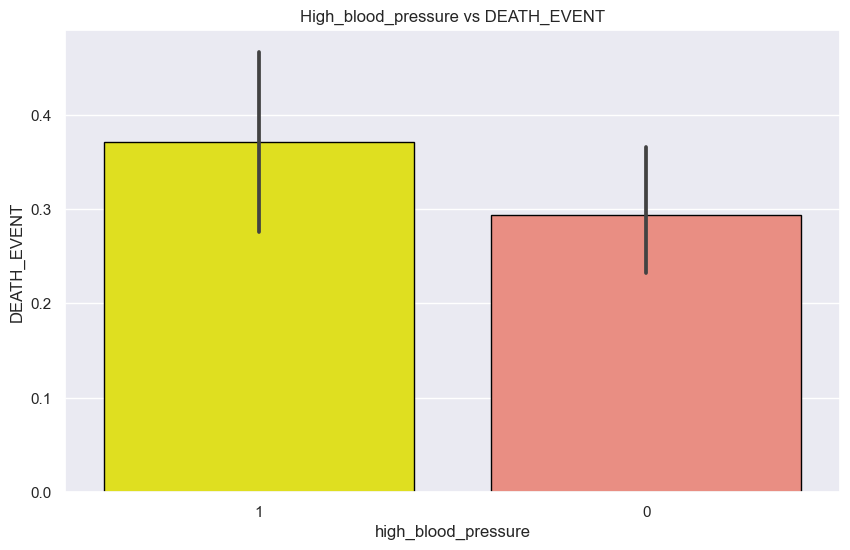

In [113]:
for i, var in enumerate(categorical_var_copy):

    # This line converts the data type of the 'var' column in the 'df' DataFrame to string. 
    # This is done because seaborn's barplot function requires categorical variables to be of type string.
    df[var] = df[var].astype(str)  

    plt.figure(figsize=(10, 6))

    sns.barplot(x=var, y="DEATH_EVENT", palette=['yellow', 'salmon'], data=df, orient='vertical', edgecolor='black')

    # This line sets the title for the plot. The title is a string that includes the 'var' variable and 'DEATH_EVENT'.
    plt.title(f"{var.capitalize()} vs DEATH_EVENT")

    plt.show()

## Anemia

1. **Observation**:
     - The (anemia) bar is slightly taller than (no anemia).
     - This suggests that patients with anemia have a slightly higher **DEATH_EVENT** rate compared to those without anemia.
     - However, the difference is not substantial, and there is some variability (indicated by the error bars).

2. **Clinical Considerations**:
   - Anemia may be associated with an increased risk of death in this dataset.
   - Healthcare professionals should consider monitoring anemic patients closely and addressing potential interventions to improve outcomes.
   
## Diabetes

1. **Observation**:
     - (no diabetes) bar is slightly taller than the (diabetes).
     - This suggests that patients without diabetes have a slightly higher survival rate compared to those with diabetes.
     - However, the difference remains relatively small, and there is still some variability (indicated by the error bars) as there is more uncertainty in diabetes patients.

2. **Clinical Considerations**:
   - While the difference in survival rates is subtle, healthcare professionals should continue monitoring patients with diabetes closely.
   - Individualized care plans should address diabetes management and its potential impact on outcomes.
   
## High Blood Pressure

1. **Observations**:
    - (high blood pressure) bar is taller than (no high blood pressure).
    - This suggests that patients with high blood pressure have a higher **DEATH_EVENT** rate compared to those without high blood pressure.
    - However, the difference remains relatively small, and there is still some variability (indicated by the error bars). which means there is greater uncertainty in (high blood pressure)

2. **Clinical Considerations**:
   - While the difference in survival rates is subtle, healthcare professionals should continue monitoring patients with high blood pressure closely.
   - Managing blood pressure effectively may be crucial for improving outcomes.
   - Further investigation into risk factors associated with high blood pressure-related mortality is warranted.
   
### 5.11 Continuous Data
Here I will visualize and analyse the rest of Continuous values

In [114]:
continuous_variables.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


As seen from the output obove, there is age	creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium	time. age already has been analysed before so then I will remove this by making a copy of continuous_variables. **I will do this using data preprocessing and data cleaning**.

In [115]:
continuous_var_copy = continuous_variables.copy() # Create a copy of the original dataframe and modify it

# Remove 'sex' columns from the copy
continuous_var_copy = continuous_var_copy.drop(columns=['age'])

continuous_var_copy.head() # to confirm

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,582,20,265000.00,1.9,130,4
1,7861,38,263358.03,1.1,136,6
2,146,20,162000.00,1.3,129,7
3,111,20,210000.00,1.9,137,7
4,160,20,327000.00,2.7,116,8


In [116]:
for i,continuous_copy in enumerate(continuous_var_copy):
    print(i, continuous_copy)

0 creatinine_phosphokinase
1 ejection_fraction
2 platelets
3 serum_creatinine
4 serum_sodium
5 time


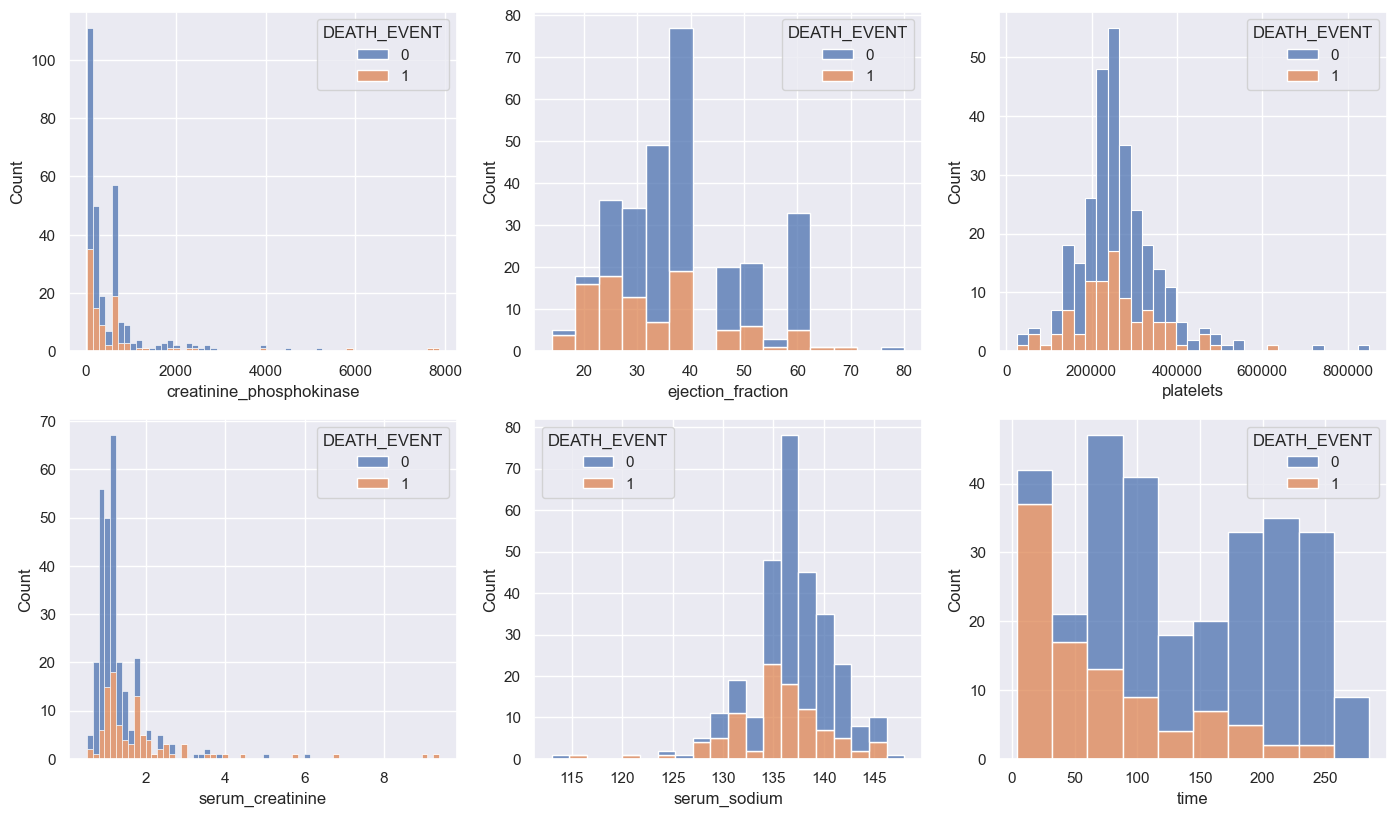

In [118]:
import warnings # Ignore warnings for this code block

# [7] Note; this code is not mine but I made changes like avoiding warnings and wrote comments and did analysations myself.

# This line starts a context manager that will catch warnings. 
# Any warnings that generated inside this context will be handled according to the rules set up by 'filterwarnings' function.
with warnings.catch_warnings():
    
    # This line sets up a rule to ignore warnings of the category 'FutureWarning'. 
    # FutureWarnings are typically raised when a feature or aspect of the Python language is changing in a future version.
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    plt.figure(figsize=(17,15))
    
    # This 'for' loop iterates over each element in the 'continuous_var_copy' list. 
    # The enumerate() function is used to get both the index (j) and the value (continuous_copy) of each element.
    for j, continuous_copy in enumerate(continuous_var_copy):
        
        # This line replaces any infinite values (np.inf or -np.inf) in the 'continuous_copy' column of the 'df' DataFrame 
        # with NaN.
        df[continuous_copy] = df[continuous_copy].replace([np.inf, -np.inf], np.nan)

        # This line creates a subplot in the figure. The '3,3' argument specifies that the figure should have a grid of 3x3 
        # subplots, and the 'j+1' argument specifies the index of the current subplot.
        plt.subplot(3,3,j+1)

        # 'multiple' argument is set to 'stack', which means that bars for different hues will be stacked on top of each other.
        sns.histplot(data = df, x= continuous_copy, hue = "DEATH_EVENT", multiple="stack")

    plt.show()

1. **Creatinine Phosphokinase (CPK)**:
     - Most patients have CPK levels below 2000.
     - There is no clear separation between the two groups based on CPK levels.
     - Further Analysis is done in **5.12 Exploring how ejection function, serum creatinine and others impact outcomes.** for this.

2. **Ejection Fraction**:
     - Patients with higher ejection fraction tend to have better survival rates.
     - The orange bars (non-survivors) are more prominent at lower ejection fraction values.

3. **Platelets**:
     - Most patients have platelet counts around 200,000 to 400,000.
     - No significant difference in platelet counts between survivors and non-survivors.
     - Further Analysis is done in **5.12 Exploring how ejection function, serum creatinine and others impact outcomes.** for this.

4. **Serum Creatinine**:
    - Non-survivors tend to have higher serum creatinine levels but here its more prominent below 2.

5. **Serum Sodium**:
   - Most patients have serum sodium levels around 135 to 145.
   - No clear separation between survivors and non-survivors based on serum sodium.
   - Further Analysis is done in **5.12 Exploring how ejection function, serum creatinine and others impact outcomes.** for this.

6. **Time**:
    - Longer follow-up time is associated with better survival rates.
    - Non-survivors tend to have shorter follow-up periods.

In Conclusion, findings for ejection fraction and time got validated by **5.5 Survival Analysis**.

### 5.12 Exploring how ejection function, serum creatinine and others impact outcomes.
Here i will create a regression plot (scatter plot with a fitted regression line) to visualize the impact of specific features on the probability of heart failure.

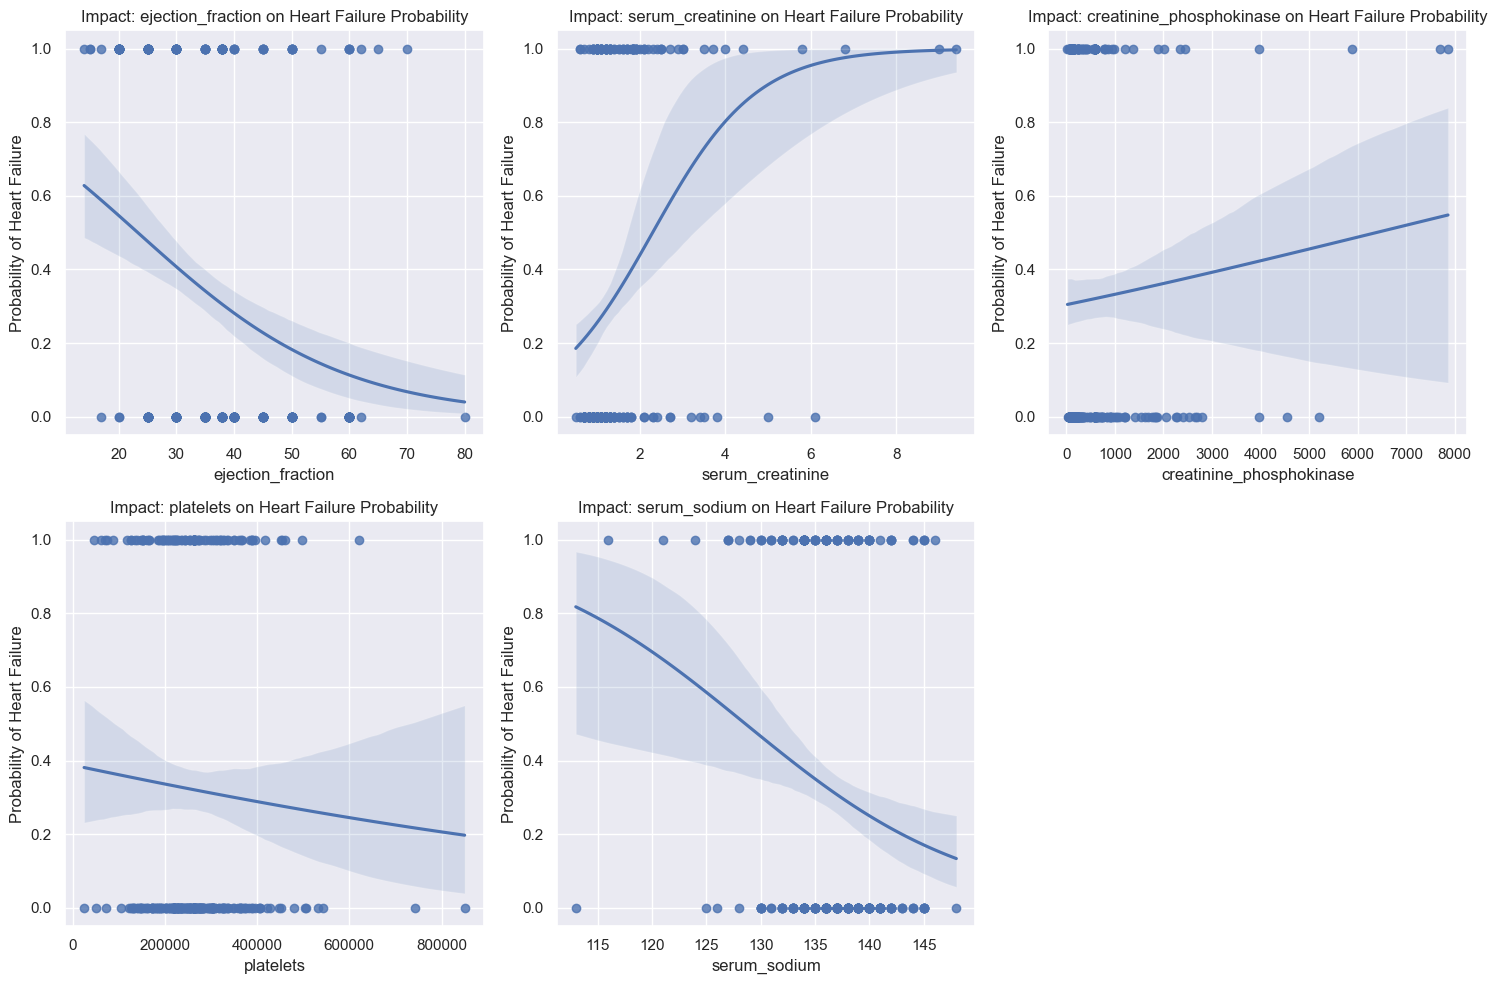

In [119]:
# Define the features I want to visualize. These are the columns in my dataframe.
features = ["ejection_fraction", "serum_creatinine", "creatinine_phosphokinase", "platelets", "serum_sodium"]

# Create a 2x3 grid of subplots. This will create a figure with 2 rows and 3 columns of subplots.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterate through each feature in the list of features.
for i, feature in enumerate(features):
    # Calculate the row and column indices for the subplot. 
    # This is done using the divmod function, which returns the quotient and remainder of division.
    row, col = divmod(i, 3)
    
    # Create a regression plot for the current feature. The 'logistic=True' argument means that a logistic regression is fitted.
    sns.regplot(x=feature, y="DEATH_EVENT", data=df, logistic=True, ax=axes[row, col])
    
    # Set the x-axis label to the current feature.
    axes[row, col].set_xlabel(feature)
    
    # Set the y-axis label to "Probability of Heart Failure".
    axes[row, col].set_ylabel("Probability of Heart Failure")
    
    # Set the title of the subplot to "Impact: {feature} on Heart Failure Probability".
    axes[row, col].set_title(f"Impact: {feature} on Heart Failure Probability")

# Remove the 6th subplot (which is empty) as we only have 5 features to visualize.
fig.delaxes(axes[1, 2])

# Adjust the spacing between the subplots to make sure that the subplots do not overlap.
plt.tight_layout()

plt.show()

1. **Impact: ejection_fraction on Heart Failure Probability**:
    - The plot shows a negative relationship between ejection fraction and the probability of heart failure.
    - As the ejection fraction increases, the probability of heart failure decreases. This indicates that patients with higher ejection fraction values are less likely to experience heart failure.
    - The curved regression line suggests a non-linear relationship, with the probability of heart failure decreasing more rapidly at lower ejection fractions.

2. **Impact: serum_creatinine on Heart Failure Probability**:
   - The plot shows a positive relationship between serum creatinine and the probability of heart failure.
   - As serum creatinine levels increase, the probability of heart failure also increases. Higher levels of serum creatinine, which indicate impaired kidney function, are associated with a higher risk of heart failure.
   - The curved regression line indicates a non-linear relationship, with the probability of heart failure increasing more rapidly at higher creatinine levels.

3. **Impact: creatinine_phosphokinase on Heart Failure Probability**:
    - The plot shows a slight positive relationship between creatinine phosphokinase levels and the probability of heart failure, with a large variance.
    - Higher levels of creatinine phosphokinase, which can indicate muscle damage, may be associated with a higher probability of heart failure, but the relationship is not strong and has high variability.
   
4. **Impact: platelets on Heart Failure Probability**:
    - The plot shows a slight negative relationship between platelet count and the probability of heart failure.
    - Higher platelet counts are associated with a slightly lower probability of heart failure. However, the relationship is weak and not very pronounced.

5. **Impact: serum_sodium on Heart Failure Probability**:
    - The plot shows a negative relationship between serum sodium and the probability of heart failure.
    - Lower levels of serum sodium are associated with a higher probability of heart failure. Hyponatremia (low sodium levels) is a known marker of poor prognosis in heart failure patients.

These plots suggest that several factors are associated with the probability of heart failure.

- The plots demonstrate that ejection fraction and serum sodium have the most clear and strong negative relationships with heart failure probability.
- Serum creatinine has a strong positive relationship with heart failure probability, suggesting its significant role as a predictor.
- Creatinine phosphokinase and platelets show weaker relationships with heart failure probability.

### 5.13 Which features are the most important in predicting Heart Failure death
Here I will find out and calculates the feature importances for a Random Forest Classifier model trained on my dataset. The feature importances indicate how useful each feature is in predicting the target variable (DEATH_EVENT).

**trade-offs: Complexity vs. Interpretability:** I used a Random Forest Classifier to calculate feature importances, which is a more complex model that can capture non-linear relationships and interactions between features.

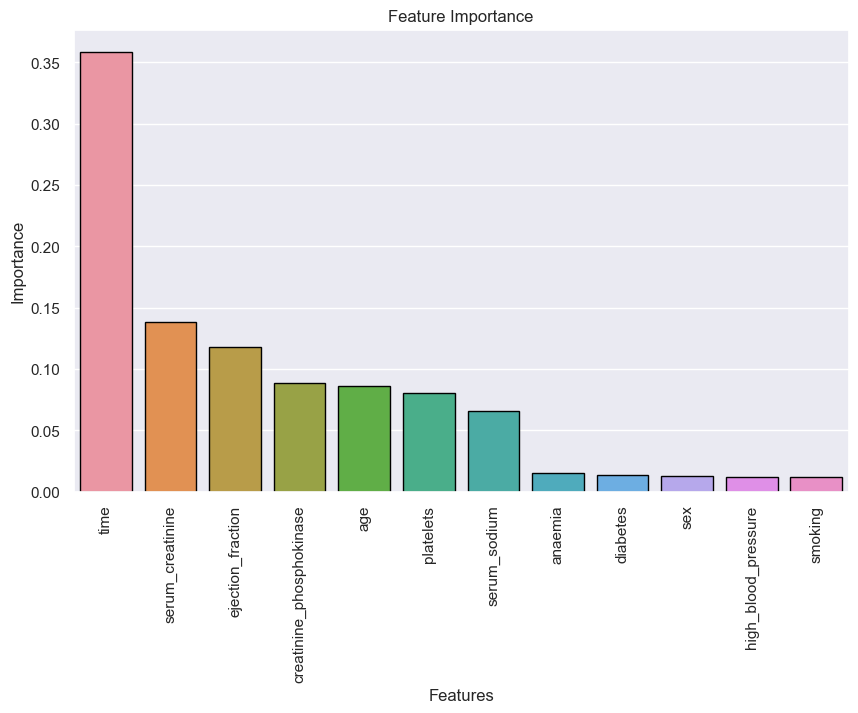

In [120]:
# Since dataset have features (X) and target (y)

# Drop the column "DEATH_EVENT" from the dataframe df and assign it to X. X now contains all the features.
X = df.drop(columns=["DEATH_EVENT"])

# Assign the column "DEATH_EVENT" from the dataframe df to y. y is the target variable we want to predict.
y = df["DEATH_EVENT"]

# Initialize the RandomForestClassifier model. This is a machine learning model used for classification tasks.
model = RandomForestClassifier()

# Fit the model to the data. This is where the model learns the relationship between the features (X) and the target (y).
model.fit(X, y)

# Get the importance of each feature. This tells us how much each feature contributes to the model's predictions.
feature_importances = model.feature_importances_

# Create a DataFrame for the feature importances. This makes it easier to visualize and understand the data.
importances_df = pd.DataFrame({
    'Features': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by the importance of the features. This allows us to see which features are most important.
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))

# Create a bar plot of the feature importances. The edgecolor parameter defines the color of the edge of the bars.
sns.barplot(x='Features', y='Importance', data=importances_df, edgecolor='black')

plt.xlabel('Features')

plt.ylabel('Importance')

plt.title('Feature Importance')

plt.xticks(rotation=90)

plt.show()

As seen from above, the follow up time predict the most deaths which validated the findings in **5.11**. Then the 2nd most important feature is serum creatinine which validated the findings in **5.11 & 5.12**, then ejection fraction validated the findings in **5.11**. All features importance are listed in order from most important to least. This also validates the findings in **5.5 Survival Analysis**. Moreover, this [Article](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5) also validated my findings for serum creatinine and ejection fraction.

The 2nd and 3rd important features are Serum Creatinine and Ejection Fraction, as seen from that same article which says Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. So I wish to find out about these two in more detail.

### 5.14 Relationship between serum creatinine and ejection fraction

Both serum creatinine and ejection fraction are already analysed individully in **5.5 Survival Analysis**, however I want to 
analyze the relationship between these two to find credibility in the statement said by that same article. The article say Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone.

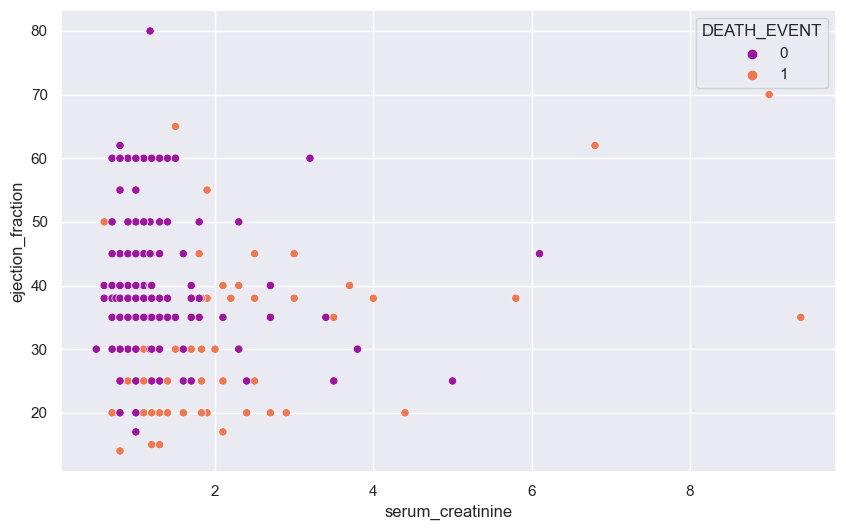

In [121]:
plt.figure(figsize=(10, 6))
# Visualize the relationship between 'serum creatinine', 'ejection fraction', and 'survival'
sns.scatterplot(data=df, x='serum_creatinine', y='ejection_fraction', hue='DEATH_EVENT', palette='plasma')
plt.show()

Let's analyse the output above:

- **Serum Creatinine**: This is represented on the x-axis and ranges approximately from 0 to 9. Serum creatinine is a blood measurement that's often used in diagnosing kidney function.

- **Ejection Fraction**: This is represented on the y-axis and ranges from about 15 to 80. Ejection fraction is a measurement of the percentage of blood leaving your heart each time it contracts, and it's often used to assess heart function.

From the graph, it appears that there's a correlation between serum creatinine levels, ejection fraction percentages, and mortality ('DEATH_EVENT'). Most of the data points are clustered between serum creatinine levels of around 1 to 2 and ejection fraction percentages from about 20 to 60. 

- There's a noticeable concentration of (no death event) points at lower serum creatinine levels and higher ejection fraction percentages. This suggests that lower serum creatinine levels and higher ejection fraction percentages might be associated with a lower likelihood of death events occurring.

- Conversely, there are more (death event) points at higher serum creatinine levels and lower ejection fraction percentages. This suggests that higher serum creatinine levels combined with lower ejection fraction percentages might be associated with an increased likelihood of death events occurring.

This visualization supports the statement. It suggests that serum creatinine levels and ejection fraction percentages alone could be significant predictors of survival in patients with heart failure. Therefore, machine learning models trained on these two features could potentially predict patient survival effectively. 

### 5.15 Role that ejection fraction play in predicting survival

Now I will analyze in detail to see What role does ejection fraction (EF) play in predicting survival. I am focusing on ejection fraction in detail as Ejection fraction is an indicator of heart strength [9]

While both EF and serum creatinine are important, EF might be considered more critical because it directly measures the heart’s function, which is the primary organ of concern in heart failure. On the other hand, serum creatinine is more of an indirect measure because it reflects kidney function, which can be affected by heart failure but is not the primary cause.

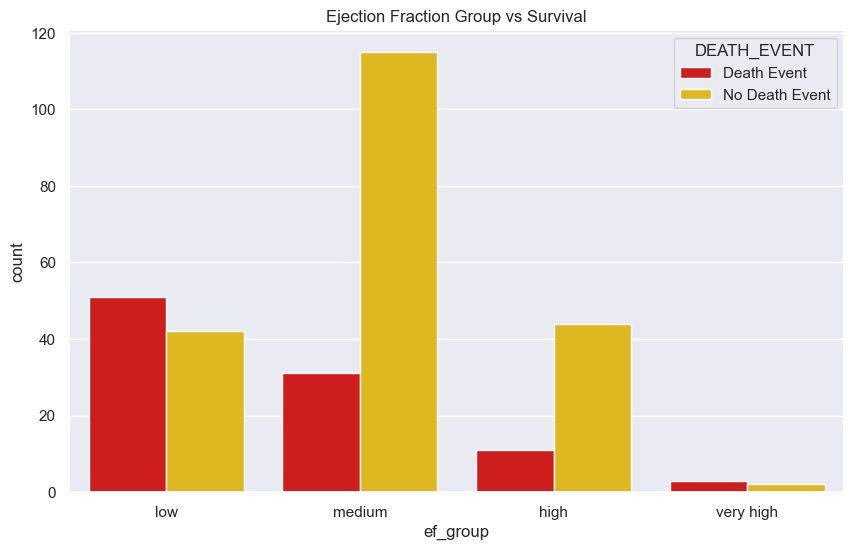

In [122]:
import warnings

warnings.filterwarnings("ignore") # Suppress all warnings for this code block.

# Create & Modify the copy
df_copy = df.copy()

# This line categorizes the 'ejection_fraction' column into groups. 
# The pd.cut() function is used to segregate array elements into different bins. 
# The 'bins' argument defines the bin edges, and the 'labels' argument provides labels for the resulting bins.
df_copy['ef_group'] = pd.cut(df_copy['ejection_fraction'], bins=[0, 30, 45, 60, 100], labels=['low', 'medium', 'high', 'very high'])

# This line converts the 'DEATH_EVENT' column to a categorical variable. 
# The .map() function is used to replace the current values (0 and 1) with the 
# specified labels ('No Death Event' and 'Death Event').
df_copy['DEATH_EVENT'] = df_copy['DEATH_EVENT'].map({0: 'No Death Event', 1: 'Death Event'})

# This line creates a new figure for the plot with a specified size (10 by 6 inches).
plt.figure(figsize=(10, 6))

# This line creates a count plot using seaborn (sns). 
sns.countplot(x='ef_group', hue='DEATH_EVENT', data=df_copy, palette='hot')

plt.title('Ejection Fraction Group vs Survival')

plt.show()

The bar chart is comparing the 'ejection_fraction' groups with the occurrence of a 'DEATH_EVENT'. There are four categories on the x-axis: low, medium, high, and very high, likely representing different ranges of ejection fraction. The y-axis represents the count of patients.

For each 'ejection_fraction' group, there are two bars representing the count of patients who had a death event (DEATH_EVENT = 1) and who did not have a death event (DEATH_EVENT = 0). 

From the chart, it appears that:
- In the 'low' ejection fraction group, there are more death events than no death events.
- In the 'medium' ejection fraction group, there are fewer death events compared to no death events.
- In the 'high' and 'very high' ejection fraction groups, there are significantly fewer death events compared to no death events.

In summary, this bar chart suggests that 'ejection_fraction' plays a significant role in predicting survival in heart failure patients. Patients with low ejection fraction seem to have a higher risk of death due to heart failure, while patients with high or very high ejection fraction have a lower risk.

The chart shows that EF, which directly measures how well the heart is pumping blood, can be a strong predictor of survival in heart failure patients. This aligns with the statement that EF might be considered more critical because it directly measures the heart’s function.

On the other hand, serum creatinine is an indirect measure as it reflects kidney function, which can be affected by heart failure but is not the primary cause. While serum creatinine is important, its role might be secondary compared to EF in the context of heart failure.

Therefore, the observations from the bar chart provide visual evidence supporting the statement that while both EF and serum creatinine are important, EF might be considered more critical in predicting survival in patients with heart failure. However, it’s important to note that this doesn’t diminish the importance of serum creatinine levels, especially in patients with heart failure where kidney function can also be compromised. Both measures provide valuable information and are often used together in the management and treatment of heart failure. 

### 5.16 performing prediction
Here I will perform a simple prediction by using the **target variable** named DEATH_EVENT.

In [123]:
df.groupby("DEATH_EVENT").count() # To check if target variable is balanced or not.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In my case, the dataset is imbalanced because the number of heart failure cases (deaths) is significantly smaller than the number of non-heart failure cases (survivals). This imbalance can lead to biased feature importance estimates. In an imbalanced dataset, features that are more prevalent in the majority class (survival) may dominate the importance calculation.

Therefore, to solve this imbalance I will do Random oversampling which is a technique that duplicates examples from the minority class to balance the class distribution in an imbalanced dataset. 

**Trade-offs: Handling Imbalanced Data** I addressed the issue of imbalanced data by using Random OverSampling. By duplicating examples from the minority class (DEATH_EVENT = 1), I balanced the class distribution in my dataset, which helps the model learn effectively from minority class examples.

In [124]:
# I wrote this code myself, taking help from [10]

# Since data have features (X) and target (y)

# Drop the column "DEATH_EVENT" from the dataframe df and assign it to X. X now contains all the features.
X = df.drop(columns=["DEATH_EVENT"])

# Assign the column "DEATH_EVENT" from the dataframe df to y. y is the target variable we want to predict.
y = df["DEATH_EVENT"]

# Initialize the RandomOverSampler. This is a technique used to handle imbalanced datasets. 
# It works by randomly duplicating examples in the minority class.
# The random_state parameter ensures that the random number generator produces the same results each time the code is run.
oversampler = RandomOverSampler(random_state=42)

# Resample the data. This will create a new dataset where the minority class has been oversampled to match the majority class.
# The fit_resample method is used to fit the RandomOverSampler to the data and then resample it.
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Example: Print the new class distribution. This will show the number of examples in each class after resampling.
# The value_counts method is used to count the number of examples in each class.
print(pd.Series(y_resampled).value_counts())

DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


By adding more instances of the minority class (DEATH_EVENT = 1 in this case), we create a more balanced dataset. This helps the model learn from the minority class effectively. So now X_resampled and y_resampled contain the balanced dataset. I can use these for training my model.

**trade-offs: Complexity vs. Interpretability:** I chose to use a Logistic Regression model for its interpretability. Despite its potential limitations in capturing non-linear relationships, it’s a good starting point for understanding the factors that influence heart failure.

In [125]:
# I wrote this code myself, taking help from [11] and [12]

# Since data have features (X) and target (y)

# Drop the column "DEATH_EVENT" from the dataframe df and assign it to X. X now contains all the features.
X = df.drop(columns=["DEATH_EVENT"])

# Assign the column "DEATH_EVENT" from the dataframe df to y. y is the target variable we want to predict.
y = df["DEATH_EVENT"]

# Initialize the RandomOverSampler. This is a technique used to handle imbalanced datasets. 
# It works by randomly duplicating examples in the minority class.
# The random_state parameter ensures that the random number generator produces the same results each time the code is run.
oversampler = RandomOverSampler(random_state=42)

# Resample the data. This will create a new dataset where the minority class has been oversampled to match the majority class.
# The fit_resample method is used to fit the RandomOverSampler to the data and then resample it.
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets. 
# The test_size parameter specifies the proportion of the data to be used as the test set.
# The random_state parameter ensures that the split produces the same results each time the code is run.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the logistic regression model with increased max_iter. 
# The max_iter parameter specifies the maximum number of iterations for the solver to converge.
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data. This is where the model learns the relationship between the features and the target.
model.fit(X_train, y_train)

# Make predictions on the test data. The predict method is used to make predictions on new data.
y_pred = model.predict(X_test)

# Evaluate the model. The accuracy_score function is used to calculate the accuracy of the predictions.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report. 
# The classification_report function provides a text report showing the main classification metrics.
print(classification_report(y_test, y_pred))

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.74      0.83      0.78        41

    accuracy                           0.77        82
   macro avg       0.77      0.77      0.77        82
weighted avg       0.77      0.77      0.77        82



The output provided is a classification report for a heart failure prediction model. This report provides several metrics to evaluate the performance of the model.

The first metric is accuracy, which is the ratio of the number of correct predictions to the total number of predictions. In this case, the accuracy is 0.77, which means that the model correctly predicted 77% of the samples.

The next set of metrics are precision, recall, and F1-score for each class (0 and 1). Class 0 represents the absence of heart failure, while class 1 represents the presence of heart failure.

Precision is the ratio of the number of true positives (correctly predicted heart failure cases) to the total number of positive predictions (both true positives and false positives). In this case, the precision for class 0 is 0.81, which means that when the model predicts that a patient does not have heart failure, it is correct 81% of the time. The precision for class 1 is 0.74, which means that when the model predicts that a patient has heart failure, it is correct 74% of the time.

Recall (also known as sensitivity) is the ratio of the number of true positives to the total number of actual positives (both true positives and false negatives). In this case, the recall for class 0 is 0.71, which means that the model correctly identified 71% of the patients who did not have heart failure. The recall for class 1 is 0.83, which means that the model correctly identified 83% of the patients who had heart failure.

The F1-score is the harmonic mean of precision and recall, and it provides a balance between the two metrics. In this case, the F1-score for class 0 is 0.75, and the F1-score for class 1 is 0.78.

The last two lines of the report provide the macro-average and weighted-average of the precision, recall, and F1-score. The macro-average is the average of the metrics for each class, while the weighted-average is the average of the metrics weighted by the number of samples in each class.

In summary, the classification report shows that the model has a good accuracy (77%), but it is slightly better at predicting the presence of heart failure (class 1) than the absence of heart failure (class 0). The recall and F1-score for class 1 except precision are all higher than those for class 0, which suggests that the model is more confident in predicting heart failure cases than non-heart failure cases.

## 6. Preprocessing Steps

1. **Data Cleaning & processing**: checked missing and duplication values **5.3**. did minor data cleaning in the copies of categorical **5.10** and continuous data **5.11** and did major data cleaning in webscraping **2.3**. Also did data cleaning in columns info **3.1**. And in **5.16** I did data processing in sampling.
2. **Feature Engineering**: Created new features or modified existing ones to better capture the relationships in the data. For instance, I splited the dataset into two features in **5.6** to make analysis easier and to make sure all features are analysed in detail. I also created age groups in **5.8** to capture potential non-linear effects of age on heart failure risk.

## 7. Identifying Gaps and Challenges

#### 7.1 Challenges Encountered

I am not a beginner in coding so I understood the coding part but struggled with the analysis and webscraping part as I am a beginner in this. below are some other challenges I faced:

**Non-linearity**: Some relationships between features and the target variable were non-linear, making it difficult to capture these using simpler visualizations or models and some just can't be visualized in simple way as seen in **5.11** and **5.12**.

**Webscrsping**: I had a hard time when scraping a table in wikipedia for a few reasons:

1. **Rowspan**: The table uses the `rowspan` attribute, which means some cells span multiple rows. This can complicate the process of determining which cells belong to which rows when scraping the table.

2. **Nested tags**: The table contains nested tags, such as `<a>` tags within `<td>` tags. These can add complexity to the scraping process, as I would need to decide how to handle the nested content.

3. **Mixed content**: The table contains a mix of text and links. I would need to decide whether to scrape just the text, just the links, or both.

So therefore, I decided to do HTML parsing. In this process, I used BeautifulSoup to parse or analyze the HTML string. Parsing involves taking the HTML string and breaking it down into more manageable pieces, like tags and their content.

#### 7.2 Gaps in the Dataset

1. **Biases**: Potential biases in the data collection process could influence the findings. For instance, the dataset might not be representative of all demographics. Only 96 patients died during the follow-up period. 
2. **Limitation of Data**: dataset is of small size (299 patients) a larger dataset would have allowed us to obtain more reliable results. Additional information about the physical features of the patients (height, weight, body mass index, etc.) and their occupational history would have been useful to detect additional risk factors for cardiovascular health diseases
3. **Imbalanced Dataset**: Although dataset had  fewer instances of death events, this was fixed with sampling. But there is another imbalance, in sex where only 35.1% of Patients were Female.
The imbalance in death events might be because the data mentioned in the dataset corresponds to only the certain period of time (April 2015 - December 2015) and more number of patients might have died after this period (which isn't recorded).

#### 7.3 Limitations of Tools and Techniques

1. **Model Limitations**: Logistic regression, while interpretable, may not capture complex patterns as effectively as more sophisticated models.
2. **Visualization Tools**: While Matplotlib and Seaborn are powerful, they can be limited in handling very large datasets or highly interactive visualizations.

## 8. Documentation for Reproducibility

1. **Code Comments**: Added detailed comments in the code to explain each step. The comments that are very long are written in Markdown, instead of in code. I also made sure not to repeat the comments for the same line of code again, such as the code line 'plt.show' and others.
2. **Notebook Format**: Used Jupyter Notebooks to document the analysis process, making it easy to follow and reproduce.

## 9. Summary of Findings

#### 9.1 Interesting Patterns and Correlations

1. **Leading cause of deaths**: Leading cause of death is cardiovascular diseases. 
2. **Survival Analysis**: age, ejection fraction, serum sodium levels, and time are strongly associated with heart failure survival. And anaemia, creatinine phosphokinase, diabetes, high blood pressure, platelets, sex, and smoking status do not show a strong association.
3. **Ejection Fraction**: Strong negative correlation with heart failure probability. Higher ejection fractions are associated with lower risk.
4. **Serum Creatinine**: Positive correlation with heart failure probability. Higher serum creatinine levels indicate higher risk.
5. **Age Analysis**: People of age 70 and beyond showed decrease in deaths and in distribution of heart failure visualized in histograms which could be a bias or an exception, it is actually because people of this age and beyond are less in numbers in the dataset.
6. **Correlation**: there's a correlation between serum creatinine levels and ejection fraction which suggest higher serum creatinine levels combined with lower ejection fraction percentages might be associated with an increased likelihood of death events occurring. So Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone

#### 9.2 Contribution to Understanding

The Analysis provides an idea on how to find authentic data and follow its ethical guidlines in order to use it and also provides the idea on how to validate dataset's findings 

The analysis provides insights into Survival Analysis and key predictors of heart failure, highlighting the importance of features like ejection fraction and serum creatinine and also follow up time.

## 10. Reflection and Missing Steps

#### 10.1 Missing Steps

1. **Advanced Modeling**: Implementing more complex models like Gradient Boosting or Neural Networks could capture more intricate patterns.
2. **Hyperparameter Tuning**: Conducting extensive hyperparameter tuning to optimize model performance was not fully explored.
3. **Limitation of Data**: Using additional information about the physical features of the patients (height, weight, body mass index, etc.) and their occupational history would have been useful to detect additional risk factors for cardiovascular health diseases
4. **Advance visualization**: Doing advance visualization could capture features in more detail that are are weakly related to heart failure (see in **5.12**)

#### 10.2 Learnings and Improvements

1. **Data Analysis**: Gained a basic knowledge of Webscraping, Visualization, Data Manipulation etc.
2. **Feature Engineering**: Gained a deeper understanding of the importance of creating and selecting relevant features.
3. **Class Imbalance Handling**: Realized the critical impact of addressing class imbalance on model performance.

#### 10.3 Further Research 

1. **Explore more python libraries**: I could explore and do analysis in other library to make interactive graphs or plots.
2. **Incorporate More Features**: I could explore additional features or external data sources to enhance predictive power.
3. **Analyze more features**: I could perhaps analyze a bigger dataset with more features like weight, height, etc.
4. **Statistical Hypothesis Testing**: I could do some statistical tests such as chi-square tests to determine if there is a significant association between categorical variables or do T-Test or ANOVA to compare the means of continuous variables (e.g., age, ejection fraction) between different groups to check for significant differences.
5. **Other Cardiovascular Diseases**: I could also do analysis on other cardiovascular diseases, such as coronary heart disease which cause the most deaths amongst other cardiovascular diseases.

## 11 Conclusion

#### 11.1 Recap of Main Findings

- **Key Predictors**: Ejection fraction, serum creatinine, and age are crucial predictors of heart failure.
- **Impact of Smoking**: Contrary to expectations, there is not much difference between smokers and non-smokers.
- **Feature Importance**: Follow-up time emerged as the most significant predictor.
- **Age Analysis**: People of age 70 and beyond showed decrease in deaths and in distribution of heart failure visualized in histograms which could be a bias or an exception but they are just fewer in numbers in the dataset. But also, the number of patients died is more than alive patients from age 80 and so on.

#### 11.3 Value of Analysis

The analysis provides valuable insights into the factors influencing heart failure, aiding in the development of targeted interventions and improving patient outcomes. It also highlights the importance of addressing class imbalance and employing robust feature engineering techniques.

## 12. References and Resources

## 12.1 References

Note: All the resources of **2. Webscraping** and **3. Dataset** related to license, ethics and resource origins are not mentioned here, but they’re mentioned and hyperlinked at specific places where exactly their contents are used. I did this becuase its a necessary requirement to write statements and follow guidlines related to license right where their resources are used.

I also didnt wrote down the articles mentioned in **5.8** & **5.13** as I didnt exactly used their resources but only used them to validate my findings & analysis.

[1] MSN. Heart failure [Online]. Available: https://www.msn.com/en-us/health/condition/Heart-failure/hp-Heart-failure?source=conditioncdx

[2] Mayo Clinic. (April 20, 2023). Heart failure - Symptoms and causes [Online]. Available: https://www.mayoclinic.org/diseases-conditions/heart-failure/symptoms-causes/syc-20373142

[3] American Heart Association. Heart Failure [Online]. Available: https://www.heart.org/en/health-topics/heart-failure

[4] American Heart Association. What is Heart Failure? Written by American Heart Association editorial staff and reviewed by science and medicine advisors (Last reviewed Mar 22, 2023). [Online]. Available: https://professional.heart.org/en/health-topics/heart-failure/what-is-heart-failure

[5] Zuci Systems. Data Science in Healthcare. Written by Janaha Vivek [Online]. Available: https://www.zucisystems.com/blog/data-science-in-healthcare/

[6] Talent500. Data Science in Healthcare. Written by Afreen Khalfe (December 26, 2023) [Online]. Available: https://talent500.co/blog/data-science-in-healthcare/

[7] DataScienceRoadMapDSRM. Heart Failure Prediction ML (2023) [Online]. Available: https://github.com/DataScienceRoadMapDSRM/Data-Science-projects/blob/main/heart-failure-prediction-ml.ipynb

[8] Stack Overflow. Grouping/Categorizing ages column (2018) [Online]. Available: https://stackoverflow.com/questions/52753613/grouping-categorizing-ages-column

[9] Cleveland Clinic. Ejection Fraction [Online]. Available: https://my.clevelandclinic.org/health/articles/16950-ejection-fraction

[10] Medium. Tackling Imbalance in Machine Learning: An In-Depth Guide to Random Oversampling. Written by Random Xan (Jan 3, 2024) [Online]. Available: https://medium.com/@randomxan/tackling-imbalance-in-machine-learning-an-in-depth-guide-to-random-oversampling-b6a0d9fb036c

[11] Colab Research Google. End-to-End Heart Disease Classification. Available at CongLiu-CN's GitHub repository AIisLove [Online]. Available: https://colab.research.google.com/github/CongLiu-CN/AIisLove/blob/master/_notebooks/2020-04-30-end-to-end-heart-disease-classification.ipynb

[12] AM-mirzanejad. Heart Failure Prediction (2024) [Online]. Available: https://github.com/AM-mirzanejad/Heart-Failure-Prediction/blob/main/Heart-Prediction.ipynb

## 12.2 Resources used throughout

### Heart Failure

Platelets: https://www.ucsfhealth.org/medical-tests/platelet-count

Serum Creatinine: https://www.medicinenet.com/creatinine_blood_test/article.htm

Serum Sodium: https://www.healthcheckup.com/general/normal-sodium-levels-in-blood/

### Documentations

1. **requests**: https://requests.readthedocs.io/en/latest/

2. **BeautifulSoup**: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

3. **pandas**: https://pandas.pydata.org/docs/

4. **numpy**: https://numpy.org/doc/stable/

5. **matplotlib**: https://matplotlib.org/stable/index.html

6. **matplotlib.patches**: https://matplotlib.org/stable/api/patches_api.html

7. **seaborn**: https://seaborn.pydata.org/tutorial/introduction

8. **RandomForestClassifier (sklearn)**: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

9. **RandomOverSampler (imblearn)**: https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.RandomOverSampler.html

10. **train_test_split (sklearn)**: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

11. **LogisticRegression (sklearn)**: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

12. **accuracy_score, classification_report (sklearn)**: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [126]:
!pip freeze > requirements.txt